#### Author: Trung Kien Nguyen

Created_Date : 06/09/2018

Modified_Date: 03/10/2018


Environment: Python 3.6.0 and Anaconda 5.2.0 (64-bit)

Version: 2.1

Libraries used:
* pandas (for data frame, included in Anaconda Python 3.6) 
* numpy (included in Anaconda Python 3.6)
* matplotlib (include in Anconda Python 3.6)
* seaborn 0.9.0
* scipy 0.19



## 1. Introduction

This project comprises the execution of exploring, understanding and pre-processing the data in the csv format. We will conduct both graphical and non-graphical EDA method to understand the data, find the error from the data and then correct the error as much as possible. 

The dataset is about delivering packages using drones in Victoria, Australia. Following is description of data:

```
Id: A unique id for the delivery.
Drone Type: A categorical attribute for the type of the drone ( takeOff, onRoute, Landing ), takeOff and Landing phases 
only take five minutes.
Post Type: A categorical attribute for the type of delivery (0: normal, 1: express)
Package Weight: The weight of the package
Origin Region: A categorical attribute representing the region for the origin of the delivery
Destination Region: A categorical attribute representing the region for the destination of the delivery
Origin Latitude:  Latitude of the origin
Origin Longitude: Longitude of the origin
Destination Latitude:  Latitude of the destination
Destination Longitude: Longitude of the destination
Distance: Distance of journey
Departure Date: Date of departure
Departure Time: Time of departure
Travel Time: Travel time of the journey
Delivery Time: The time of the delivery
Delivery Fare: Delivery fare.

```

The output of cleaning data is: __`drone_shipping_solution.csv`__ 

This document breaks down the data wrangling tasks into the following steps:

    1. Load datasets: import Python libraries and load datasets into DataFrames.
    2. Identifing Error and Missing Data.
    3. Data Exploration and Visualization
    4. Writing output.

## 1. Loading Datasets.


Following is libraries that we are going to use through pre-processing step.

In [1]:
import pandas as pd
import numpy as np

import math
import datetime
import calendar

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the datasets from csv file into DataFrame format.
df = pd.read_csv("drone_shipping.csv")

## 2. Identifing Error and Missing Data

In this section, we are first going to indentify a very basic error of features from the given data in term of format consistency. We take each columns into consideration to find the error value of each independent feature. Then, we'll try to determine some missing data and the approach to deal with those missing value.

But first, let's quickly take a look to see what's the data

In [3]:
df.head(20)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID5389656788,1.0,1.0,48.361,15.0,11.0,-36.611716,148.014884,-38.348180,143.342324,455.704,2018-03-24,00:37:24,427.80,7:45:12,175.89
1,ID1247245215,1.0,0.0,9.767,9.0,46.0,-37.386395,143.777755,-38.335037,148.389769,418.806,2018-07-26,04:09:17,393.74,10:43:01,129.57
2,ID1608889381,3.0,0.0,31.081,8.0,2.0,-36.570318,142.820171,-38.010240,146.193967,339.034,2018-06-24,14:18:53,281.78,19:00:39,188.84
3,ID1823716073,2.0,0.0,22.683,30.0,34.0,-37.159821,146.639043,-38.764968,143.946865,296.208,2018-04-12,03:20:18,272.05,7:52:21,154.03
4,ID1878258410,2.0,0.0,45.041,29.0,20.0,-38.668791,146.317208,-37.271839,143.310111,306.271,2018-06-22,04:39:12,281.06,9:20:15,161.66
5,ID5579399991,1.0,1.0,46.525,23.0,32.0,-37.756942,144.284672,-37.553672,148.337509,357.863,2018-04-11,20:21:02,337.49,1:58:31,151.35
6,ID1912669892,NaN,0.0,25.102,37.0,3.0,-38.415790,146.834953,-37.642361,147.665897,112.787,2018-01-24,15:08:18,111.26,16:59:33,91.23
7,ID5923304990,1.0,1.0,19.284,10.0,46.0,-38.837953,143.156875,-38.196759,148.359763,458.674,2018-04-22,19:24:02,430.55,2:34:35,156.31
8,ID1921090207,2.0,0.0,26.771,44.0,21.0,-37.347241,145.216541,-38.406334,142.806483,242.356,2018-05-10,17:34:56,223.83,21:18:45,138.93
9,ID5732983765,1.0,1.0,6.174,41.0,32.0,-36.610068,144.509118,-37.505355,148.351336,355.541,2018-06-01,19:36:49,335.35,1:12:10,150.54


As you can see, the datasets involves to 39554 records with 16 features (columns name) with ID is an unique sequence start with ID following is 10 digit number.

Let's have a closer look at attributes structure.

In [4]:
df.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,39543.000000,39533.000000,39553.000000,39543.000000,39543.000000,39553.000000,39553.000000,39553.000000,39553.000000,39553.000000,39513.000000,39524.000000
mean,1.707711,0.299775,28.857675,23.998634,23.952052,-37.636753,145.540833,-37.643323,145.548649,220.419052,203.567533,148.979817
std,0.782822,0.458165,13.859111,13.569538,13.608269,1.861113,6.781813,1.864531,6.768565,114.090425,102.330884,66.319340
min,1.000000,0.000000,5.000000,1.000000,1.000000,-39.006931,-148.331113,-39.006931,-148.296246,0.126000,6.990000,69.430000
25%,1.000000,0.000000,16.952000,12.000000,12.000000,-38.356209,144.136512,-38.360396,144.148900,131.543000,124.060000,115.200000
50%,2.000000,0.000000,28.754000,24.000000,24.000000,-37.657865,145.735082,-37.662968,145.749482,208.751000,192.970000,141.715000
75%,2.000000,1.000000,40.683000,36.000000,36.000000,-36.991082,147.253580,-37.004877,147.251378,298.434000,273.480000,170.740000
max,3.000000,1.000000,61.987000,47.000000,47.000000,38.960558,148.450619,38.844606,148.450619,553.425000,514.960000,1380.420000


Overview of null data

In [5]:
df.isnull().sum()

Id                       23
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            29
dtype: int64

We notice to the missing data.

__ID__: 23 records do not have ID

__Drone Type__: 10 records have no drone type data

__Post Type__: 20 records have no post type data

__Origin Region__: 10 records have no origin region data

__Destination Region__: 10 records have no destination region data

__Travel Time__: 40 records have no travel time data

__Delivery Fare__:  29 records have no delivery fare data

### 2.1 Indentifying Error.

#### 2.1.1. Date and Time Auditing

There is no null data of delivery time and departure time, however, we need to verify the time format of those feature

From the given data, the format of time is: _%H:%M:%S_ 
```
    E.g: 04:06:16
```

The function bellow use for time verification

In [6]:
def verify_time(time):
    # our data representing time by following the pattern H:M:S ( hour: minutes: second)
    hour = time.split(":")[0]
    minute = time.split(":")[0]
    second = time.split(":")[0]
    if len(hour) < 2 or len(minute) < 2 or len(second) < 2:
        print("Incosistent format",time)
    pattern  = "%H:%M:%S"
    try:
        validation = datetime.datetime.strptime(time,pattern)
    except ValueError:
        print(time)
        raise ValueError("Incorrect time format")
    return validation

In [7]:
departure_time = df['Departure Time'].map(lambda x: verify_time(x))
delivery_time = df['Delivery Time'].map(lambda x: verify_time(x))

Incosistent format 6:23:54
Incosistent format 1:26:32
Incosistent format 7:01:26
Incosistent format 5:27:43
Incosistent format 6:08:41
Incosistent format 5:31:50
Incosistent format 7:08:53
Incosistent format 7:32:16
Incosistent format 5:10:48
Incosistent format 6:57:00
Incosistent format 6:06:35
Incosistent format 7:26:18
Incosistent format 8:47:57
Incosistent format 0:19:54
Incosistent format 8:58:19
Incosistent format 2:33:11
Incosistent format 7:45:12
Incosistent format 7:52:21
Incosistent format 9:20:15
Incosistent format 1:58:31
Incosistent format 2:34:35
Incosistent format 1:12:10
Incosistent format 3:59:33
Incosistent format 1:11:31
Incosistent format 6:09:08
Incosistent format 6:05:12
Incosistent format 4:41:48
Incosistent format 2:47:19
Incosistent format 2:15:38
Incosistent format 5:11:02
Incosistent format 2:25:26
Incosistent format 6:05:43
Incosistent format 6:12:23
Incosistent format 3:40:38
Incosistent format 3:19:26
Incosistent format 9:57:26
Incosistent format 1:12:11
I

Incosistent format 4:20:49
Incosistent format 6:48:51
Incosistent format 1:30:03
Incosistent format 0:04:25
Incosistent format 3:27:19
Incosistent format 8:15:04
Incosistent format 1:25:17
Incosistent format 9:16:22
Incosistent format 4:14:31
Incosistent format 1:15:55
Incosistent format 6:03:11
Incosistent format 0:17:04
Incosistent format 4:07:55
Incosistent format 8:43:44
Incosistent format 6:26:00
Incosistent format 2:50:44
Incosistent format 2:01:07
Incosistent format 1:13:08
Incosistent format 3:25:17
Incosistent format 3:00:30
Incosistent format 6:50:46
Incosistent format 0:31:04
Incosistent format 9:26:24
Incosistent format 0:16:00
Incosistent format 5:29:58
Incosistent format 0:48:50
Incosistent format 0:35:31
Incosistent format 9:33:13
Incosistent format 9:37:49
Incosistent format 4:50:46
Incosistent format 2:08:09
Incosistent format 9:01:34
Incosistent format 9:11:57
Incosistent format 5:30:48
Incosistent format 0:00:59
Incosistent format 3:07:18
Incosistent format 8:18:16
I

Incosistent format 9:07:54
Incosistent format 8:06:49
Incosistent format 9:40:43
Incosistent format 4:49:56
Incosistent format 0:16:19
Incosistent format 1:34:41
Incosistent format 4:18:04
Incosistent format 4:27:52
Incosistent format 1:43:26
Incosistent format 7:08:02
Incosistent format 9:00:28
Incosistent format 8:26:58
Incosistent format 2:09:11
Incosistent format 9:15:22
Incosistent format 4:03:46
Incosistent format 0:53:08
Incosistent format 4:33:10
Incosistent format 3:26:33
Incosistent format 9:17:17
Incosistent format 8:24:33
Incosistent format 4:32:28
Incosistent format 2:50:33
Incosistent format 0:15:05
Incosistent format 9:09:46
Incosistent format 2:50:08
Incosistent format 9:20:01
Incosistent format 6:05:14
Incosistent format 8:23:00
Incosistent format 4:26:47
Incosistent format 5:48:26
Incosistent format 3:44:53
Incosistent format 6:55:36
Incosistent format 2:00:23
Incosistent format 5:51:58
Incosistent format 9:26:35
Incosistent format 2:52:50
Incosistent format 7:28:24
I

Incosistent format 8:30:38
Incosistent format 1:39:51
Incosistent format 6:36:15
Incosistent format 4:22:52
Incosistent format 4:56:31
Incosistent format 1:39:52
Incosistent format 4:48:08
Incosistent format 6:33:31
Incosistent format 6:51:33
Incosistent format 6:18:50
Incosistent format 1:36:28
Incosistent format 4:05:03
Incosistent format 2:30:50
Incosistent format 7:45:42
Incosistent format 1:23:03
Incosistent format 9:27:32
Incosistent format 8:29:42
Incosistent format 9:32:17
Incosistent format 3:44:27
Incosistent format 4:07:12
Incosistent format 6:57:30
Incosistent format 6:37:43
Incosistent format 4:12:33
Incosistent format 2:00:22
Incosistent format 2:06:27
Incosistent format 3:55:01
Incosistent format 0:10:47
Incosistent format 9:34:18
Incosistent format 1:29:54
Incosistent format 7:28:49
Incosistent format 7:49:37
Incosistent format 3:03:05
Incosistent format 3:33:06
Incosistent format 9:17:40
Incosistent format 0:16:57
Incosistent format 5:00:43
Incosistent format 7:38:49
I

Incosistent format 7:27:40
Incosistent format 2:02:27
Incosistent format 3:53:14
Incosistent format 9:14:50
Incosistent format 8:41:56
Incosistent format 3:46:09
Incosistent format 8:03:13
Incosistent format 1:47:25
Incosistent format 5:21:04
Incosistent format 0:08:18
Incosistent format 5:19:49
Incosistent format 5:10:03
Incosistent format 1:24:08
Incosistent format 4:05:48
Incosistent format 3:42:57
Incosistent format 8:14:08
Incosistent format 8:43:14
Incosistent format 5:21:10
Incosistent format 6:42:38
Incosistent format 4:07:27
Incosistent format 4:08:04
Incosistent format 7:30:10
Incosistent format 5:33:05
Incosistent format 6:37:33
Incosistent format 7:23:37
Incosistent format 1:05:25
Incosistent format 2:29:03
Incosistent format 1:03:59
Incosistent format 7:59:36
Incosistent format 5:51:56
Incosistent format 9:28:23
Incosistent format 1:57:22
Incosistent format 0:35:57
Incosistent format 5:54:11
Incosistent format 7:58:09
Incosistent format 0:49:25
Incosistent format 4:52:54
I

Incosistent format 7:58:49
Incosistent format 6:54:06
Incosistent format 8:53:24
Incosistent format 6:15:11
Incosistent format 3:13:46
Incosistent format 0:14:24
Incosistent format 4:48:42
Incosistent format 0:27:58
Incosistent format 0:45:56
Incosistent format 2:39:40
Incosistent format 6:21:55
Incosistent format 4:50:13
Incosistent format 5:42:27
Incosistent format 3:43:31
Incosistent format 6:48:31
Incosistent format 8:55:47
Incosistent format 0:32:38
Incosistent format 4:50:34
Incosistent format 9:27:51
Incosistent format 4:02:45
Incosistent format 0:15:12
Incosistent format 3:28:12
Incosistent format 7:14:47
Incosistent format 2:16:17
Incosistent format 5:11:29
Incosistent format 5:02:52
Incosistent format 1:11:56
Incosistent format 0:10:37
Incosistent format 4:14:30
Incosistent format 0:58:46
Incosistent format 8:57:52
Incosistent format 6:42:09
Incosistent format 0:28:47
Incosistent format 7:02:35
Incosistent format 9:28:41
Incosistent format 6:36:38
Incosistent format 6:44:03
I

Incosistent format 8:49:03
Incosistent format 6:52:10
Incosistent format 4:04:24
Incosistent format 1:25:49
Incosistent format 4:38:36
Incosistent format 4:34:51
Incosistent format 8:50:44
Incosistent format 2:18:25
Incosistent format 7:59:43
Incosistent format 0:42:21
Incosistent format 2:33:08
Incosistent format 7:46:35
Incosistent format 1:13:53
Incosistent format 9:31:20
Incosistent format 3:52:15
Incosistent format 3:11:46
Incosistent format 9:56:13
Incosistent format 8:28:21
Incosistent format 3:22:00
Incosistent format 6:45:56
Incosistent format 1:24:38
Incosistent format 1:54:02
Incosistent format 3:16:17
Incosistent format 4:42:51
Incosistent format 8:16:59
Incosistent format 4:19:23
Incosistent format 3:25:08
Incosistent format 7:00:11
Incosistent format 2:58:22
Incosistent format 8:18:17
Incosistent format 4:41:59
Incosistent format 8:46:50
Incosistent format 0:26:22
Incosistent format 5:56:55
Incosistent format 9:01:46
Incosistent format 4:44:04
Incosistent format 4:07:54
I

Incosistent format 3:08:30
Incosistent format 5:58:50
Incosistent format 2:46:37
Incosistent format 8:30:09
Incosistent format 6:39:58
Incosistent format 5:25:00
Incosistent format 6:39:04
Incosistent format 8:31:37
Incosistent format 1:49:45
Incosistent format 4:48:41
Incosistent format 3:00:06
Incosistent format 9:24:52
Incosistent format 9:05:42
Incosistent format 3:04:06
Incosistent format 7:53:05
Incosistent format 3:08:20
Incosistent format 4:14:54
Incosistent format 8:13:02
Incosistent format 5:48:09
Incosistent format 3:51:54
Incosistent format 5:18:17
Incosistent format 2:23:07
Incosistent format 5:34:23
Incosistent format 9:01:06
Incosistent format 1:46:21
Incosistent format 5:52:03
Incosistent format 2:02:25
Incosistent format 4:26:25
Incosistent format 6:44:44
Incosistent format 6:55:45
Incosistent format 4:23:41
Incosistent format 7:21:28
Incosistent format 8:59:04
Incosistent format 6:30:56
Incosistent format 1:01:36
Incosistent format 2:12:10
Incosistent format 5:26:01
I

Incosistent format 8:09:23
Incosistent format 7:53:02
Incosistent format 6:22:05
Incosistent format 9:55:38
Incosistent format 7:56:35
Incosistent format 9:32:33
Incosistent format 3:50:09
Incosistent format 7:40:18
Incosistent format 1:22:32
Incosistent format 5:05:31
Incosistent format 8:59:41
Incosistent format 1:38:00
Incosistent format 0:49:27
Incosistent format 4:09:52
Incosistent format 1:16:05
Incosistent format 9:46:07
Incosistent format 9:43:10
Incosistent format 6:19:23
Incosistent format 5:08:46
Incosistent format 8:11:24
Incosistent format 4:04:12
Incosistent format 3:14:18
Incosistent format 9:15:57
Incosistent format 7:27:15
Incosistent format 6:41:13
Incosistent format 0:48:37
Incosistent format 7:53:39
Incosistent format 7:39:12
Incosistent format 7:37:55
Incosistent format 4:49:17
Incosistent format 7:29:29
Incosistent format 2:08:59
Incosistent format 3:59:16
Incosistent format 2:48:51
Incosistent format 4:54:39
Incosistent format 5:19:07
Incosistent format 5:49:49
I

Incosistent format 9:44:59
Incosistent format 6:02:42
Incosistent format 7:01:30
Incosistent format 6:57:11
Incosistent format 9:58:30
Incosistent format 3:19:22
Incosistent format 0:48:42
Incosistent format 3:09:59
Incosistent format 3:45:37
Incosistent format 6:55:02
Incosistent format 5:15:31
Incosistent format 7:05:55
Incosistent format 1:29:10
Incosistent format 3:16:22
Incosistent format 8:30:46
Incosistent format 6:28:54
Incosistent format 1:00:16
Incosistent format 7:51:01
Incosistent format 1:31:14
Incosistent format 9:09:32
Incosistent format 8:25:27
Incosistent format 7:28:58
Incosistent format 8:43:16
Incosistent format 9:11:38
Incosistent format 1:12:14
Incosistent format 9:43:00
Incosistent format 1:22:47
Incosistent format 4:07:23
Incosistent format 1:32:55
Incosistent format 1:04:13
Incosistent format 7:18:41
Incosistent format 0:14:07
Incosistent format 5:32:55
Incosistent format 0:35:34
Incosistent format 0:43:57
Incosistent format 9:35:08
Incosistent format 1:36:22
I

Incosistent format 9:34:34
Incosistent format 6:52:27
Incosistent format 2:26:13
Incosistent format 0:33:27
Incosistent format 9:11:37
Incosistent format 1:15:29
Incosistent format 2:48:32
Incosistent format 5:58:46
Incosistent format 2:19:29
Incosistent format 9:03:56
Incosistent format 8:24:22
Incosistent format 2:12:47
Incosistent format 0:29:55
Incosistent format 1:18:33
Incosistent format 7:09:50
Incosistent format 2:22:15
Incosistent format 7:33:37
Incosistent format 7:05:17
Incosistent format 2:50:30
Incosistent format 8:35:09
Incosistent format 7:57:10
Incosistent format 2:03:34
Incosistent format 8:16:00
Incosistent format 1:31:53
Incosistent format 9:02:01
Incosistent format 5:34:40
Incosistent format 0:25:03
Incosistent format 5:58:21
Incosistent format 8:28:04
Incosistent format 5:44:02
Incosistent format 9:59:32
Incosistent format 7:46:48
Incosistent format 0:00:29
Incosistent format 9:22:05
Incosistent format 9:07:59
Incosistent format 3:54:54
Incosistent format 6:05:57
I

Incosistent format 2:39:52
Incosistent format 2:33:25
Incosistent format 0:56:28
Incosistent format 1:06:35
Incosistent format 7:10:51
Incosistent format 1:22:35
Incosistent format 9:21:48
Incosistent format 6:01:49
Incosistent format 3:35:26
Incosistent format 4:41:12
Incosistent format 3:12:10
Incosistent format 4:57:35
Incosistent format 0:50:40
Incosistent format 4:10:07
Incosistent format 4:04:42
Incosistent format 0:41:14
Incosistent format 4:12:56
Incosistent format 1:28:14
Incosistent format 0:24:19
Incosistent format 7:30:21
Incosistent format 0:35:59
Incosistent format 7:04:59
Incosistent format 6:46:20
Incosistent format 7:00:26
Incosistent format 4:17:41
Incosistent format 5:08:49
Incosistent format 5:18:51
Incosistent format 5:40:27
Incosistent format 6:09:51
Incosistent format 6:20:09
Incosistent format 7:35:10
Incosistent format 5:47:53
Incosistent format 6:00:31
Incosistent format 5:22:45
Incosistent format 7:01:27
Incosistent format 3:21:53
Incosistent format 6:15:53
I

Incosistent format 0:29:20
Incosistent format 7:53:48
Incosistent format 0:07:37
Incosistent format 1:16:18
Incosistent format 9:55:09
Incosistent format 7:45:58
Incosistent format 9:35:25
Incosistent format 5:23:33
Incosistent format 3:47:44
Incosistent format 4:17:25
Incosistent format 1:22:35
Incosistent format 7:22:28
Incosistent format 3:20:59
Incosistent format 9:55:30
Incosistent format 2:19:24
Incosistent format 0:39:52
Incosistent format 9:34:58
Incosistent format 9:57:35
Incosistent format 7:51:34
Incosistent format 1:09:33
Incosistent format 8:46:53
Incosistent format 0:21:49
Incosistent format 4:33:15
Incosistent format 9:11:08
Incosistent format 7:42:11
Incosistent format 0:53:16
Incosistent format 2:50:36
Incosistent format 2:48:34
Incosistent format 3:27:32
Incosistent format 5:15:32
Incosistent format 0:44:34
Incosistent format 4:44:52
Incosistent format 5:26:07
Incosistent format 5:24:47
Incosistent format 3:47:16
Incosistent format 7:08:19
Incosistent format 9:01:33
I

Incosistent format 3:04:17
Incosistent format 2:15:30
Incosistent format 4:00:38
Incosistent format 3:24:47
Incosistent format 6:12:56
Incosistent format 4:14:22
Incosistent format 9:53:37
Incosistent format 9:34:34
Incosistent format 9:01:04
Incosistent format 8:48:09
Incosistent format 8:51:39
Incosistent format 7:24:39
Incosistent format 8:11:01
Incosistent format 9:39:45
Incosistent format 1:26:34
Incosistent format 0:45:12
Incosistent format 2:56:59
Incosistent format 1:55:50
Incosistent format 9:31:41
Incosistent format 5:14:54
Incosistent format 4:07:02
Incosistent format 0:44:19
Incosistent format 4:45:30
Incosistent format 8:25:08
Incosistent format 9:36:23
Incosistent format 9:57:49
Incosistent format 6:40:10
Incosistent format 8:36:09
Incosistent format 7:51:45
Incosistent format 9:02:11
Incosistent format 1:29:04
Incosistent format 9:19:30
Incosistent format 4:55:42
Incosistent format 4:13:47
Incosistent format 6:41:25
Incosistent format 3:36:16
Incosistent format 4:22:34
I

Incosistent format 9:06:50
Incosistent format 1:05:12
Incosistent format 2:10:15
Incosistent format 9:12:07
Incosistent format 7:25:24
Incosistent format 2:56:41
Incosistent format 1:09:44
Incosistent format 1:34:47
Incosistent format 9:50:14
Incosistent format 2:00:26
Incosistent format 6:00:31
Incosistent format 5:15:23
Incosistent format 6:54:31
Incosistent format 3:40:13
Incosistent format 9:50:18
Incosistent format 3:01:59
Incosistent format 0:47:49
Incosistent format 8:45:52
Incosistent format 5:22:13
Incosistent format 3:22:31
Incosistent format 7:08:20
Incosistent format 5:12:19
Incosistent format 1:12:12
Incosistent format 2:03:58
Incosistent format 1:59:33
Incosistent format 5:45:06
Incosistent format 6:19:11
Incosistent format 7:23:14
Incosistent format 4:22:37
Incosistent format 6:11:59
Incosistent format 1:47:40
Incosistent format 0:15:37
Incosistent format 8:30:07
Incosistent format 7:36:32
Incosistent format 1:57:55
Incosistent format 4:45:42
Incosistent format 5:01:10
I

Incosistent format 8:02:26
Incosistent format 5:01:00
Incosistent format 5:40:53
Incosistent format 3:01:53
Incosistent format 0:17:37
Incosistent format 1:20:32
Incosistent format 2:34:58
Incosistent format 9:09:25
Incosistent format 9:24:30
Incosistent format 4:58:01
Incosistent format 4:41:55
Incosistent format 2:59:13
Incosistent format 1:20:37
Incosistent format 3:46:10
Incosistent format 0:31:59
Incosistent format 4:03:29
Incosistent format 9:28:00
Incosistent format 5:31:53
Incosistent format 8:19:19
Incosistent format 4:21:02
Incosistent format 3:39:52
Incosistent format 6:45:20
Incosistent format 4:02:03
Incosistent format 8:00:57
Incosistent format 5:19:34
Incosistent format 4:26:19
Incosistent format 4:03:35
Incosistent format 9:12:29
Incosistent format 5:20:43
Incosistent format 4:53:59
Incosistent format 8:47:02
Incosistent format 4:15:06
Incosistent format 6:40:34
Incosistent format 3:07:29
Incosistent format 1:49:01
Incosistent format 6:28:32
Incosistent format 9:19:46
I

Incosistent format 6:14:17
Incosistent format 4:23:43
Incosistent format 9:50:15
Incosistent format 6:32:57
Incosistent format 2:18:59
Incosistent format 3:02:39
Incosistent format 4:43:53
Incosistent format 4:45:28
Incosistent format 6:56:22
Incosistent format 7:37:35
Incosistent format 9:31:28
Incosistent format 2:39:09
Incosistent format 6:00:45
Incosistent format 8:48:05
Incosistent format 0:53:05
Incosistent format 9:25:47
Incosistent format 8:06:53
Incosistent format 5:05:55
Incosistent format 7:59:01
Incosistent format 4:35:46
Incosistent format 6:48:35
Incosistent format 6:28:23
Incosistent format 7:45:06
Incosistent format 7:11:10
Incosistent format 6:13:32
Incosistent format 0:23:20
Incosistent format 8:24:07
Incosistent format 3:39:26
Incosistent format 1:56:33
Incosistent format 6:49:15
Incosistent format 3:44:08
Incosistent format 8:53:26
Incosistent format 7:43:56
Incosistent format 7:30:50
Incosistent format 3:07:24
Incosistent format 0:06:25
Incosistent format 4:53:54
I

Incosistent format 8:49:26
Incosistent format 8:37:10
Incosistent format 0:02:09
Incosistent format 4:12:46
Incosistent format 5:55:54
Incosistent format 5:43:48
Incosistent format 6:15:57
Incosistent format 8:54:12
Incosistent format 2:04:51
Incosistent format 9:32:54
Incosistent format 6:38:04
Incosistent format 9:00:28
Incosistent format 4:45:54
Incosistent format 3:33:50
Incosistent format 2:40:35
Incosistent format 6:41:19
Incosistent format 5:38:15
Incosistent format 6:25:05
Incosistent format 2:10:16
Incosistent format 3:35:21
Incosistent format 6:32:35
Incosistent format 6:39:53
Incosistent format 8:23:39
Incosistent format 1:11:19
Incosistent format 5:21:03
Incosistent format 8:23:33
Incosistent format 3:02:21
Incosistent format 5:38:44
Incosistent format 9:15:57
Incosistent format 0:09:25
Incosistent format 9:23:25
Incosistent format 4:55:26
Incosistent format 5:44:10
Incosistent format 4:28:45
Incosistent format 5:56:40
Incosistent format 7:03:42
Incosistent format 1:24:26
I

There is errors in term of pattern checking for time. For example:
```
    6:23:54 should be 06:23:54
```
We'll fix the format error for departure time as well as delivery time

In [8]:
def correct_time(time):
    # our data representing time by following the pattern H:M:S ( hour: minutes: second)
    hour = time.split(":")[0]
    minute = time.split(":")[1]
    second = time.split(":")[2]
    if len(hour) < 2:
        hour = "0"+hour
    if len(minute) < 2:
        minute = "0" + minute
    if len(second) < 2:
        second = "0" + second
    time = hour+":"+minute+":"+second
    return time

df['Departure Time'] = df['Departure Time'].map(lambda x: correct_time(x))
df['Delivery Time'] = df['Delivery Time'].map(lambda x: correct_time(x))

There is no null value for departure date, however, we'll verify the date format of this feature.

Note: from the given data, departure date is representing by following pattern: __year:month:day__


In [9]:
def validate(date_time):
    year = int(date_time.split("-")[0])
    if year <=2018 and year >= 2000:
        pattern = "%Y-%m-%d"
        try:
            datetime.datetime.strptime(date_time,pattern)
        except ValueError:
            print("Incorrect data format:",date_time)
    else:
        raise ValueError("Incorrect Year. Year must less than or equal 2018")

date_verification = df['Departure Date'].map(lambda x: validate(x))

Incorrect data format: 2018-15-04
Incorrect data format: 2018-02-30
Incorrect data format: 2018-02-30
Incorrect data format: 2018-04-31
Incorrect data format: 2018-02-30
Incorrect data format: 2018-28-04
Incorrect data format: 2018-24-02
Incorrect data format: 2018-19-02
Incorrect data format: 2018-16-02
Incorrect data format: 2018-20-06
Incorrect data format: 2018-04-31
Incorrect data format: 2018-06-31
Incorrect data format: 2018-04-31
Incorrect data format: 2018-06-31
Incorrect data format: 2018-06-31
Incorrect data format: 2018-19-02
Incorrect data format: 2018-13-02
Incorrect data format: 2018-26-06
Incorrect data format: 2018-28-07
Incorrect data format: 2018-02-30
Incorrect data format: 2018-04-31
Incorrect data format: 2018-02-30
Incorrect data format: 2018-06-31
Incorrect data format: 2018-02-30
Incorrect data format: 2018-02-30
Incorrect data format: 2018-04-31
Incorrect data format: 2018-13-03
Incorrect data format: 2018-21-01
Incorrect data format: 2018-14-01
Incorrect data

From the output above,we can see that departure date involves a lot of error. 

Following is list of error and the way we handle it.

1. Month greater than 12.
   ```
   E.g: 2018-15-04
   It is possible that month and date have been swapped. 
   Solution: swap month and date, thus 2018-15-04 will be 2018-04-15
   ```
   
2. Day of February greater than 28 if not leap year and greater than 29 if leap year
   ```
   Solution, turn the day to 29 ( cause 2018 is not a leap year )
   ```

3. Day of the month 4,6,9,11 greater than 30
   ```
   Solution, turn the day down to 30
   ```

Following is a function to correct the data


In [10]:
def correct_date(date_time):
    year = int(date_time.split("-")[0])
    month = int(date_time.split("-")[1])
    day = int(date_time.split("-")[2])
    
    if month > 12 and day <=12:
        month,day = day,month
        
    if month > 12 and day >12:
        raise ValueError("Incorrect data format. Month must be less than or equal 12")
    
    # check for leap year and correct the number of day of Feb
    if calendar.isleap(year):
        if month == 2 and day > 29:
            #do some correct data, for this moment, I assume day will be 29
            day = 29
    else:
        if month == 2 and day > 28:
            day = 28
            
    # check for number of days of particular month.
    if day > calendar.monthrange(year,month)[1]:
        day = calendar.monthrange(year,month)[1]
    
    if month < 10:
        month = "0" + str(month)
    
    if day < 10:
        day = "0" + str(day)
    date_time = "{0}-{1}-{2}".format(year,month,day)  
    return date_time

df['Departure Date'] = df['Departure Date'].map(lambda x: correct_date(x))

From our data, we see that we have depature time and delivery time. It is plausible to assume that:
``` 
    travel time = delivery time - departure time.
```

To test our assumption, we'll calculate the travel time and then get the number in the form of minutes and put it in a new columns named __Actual Travel Time__ and retain the given __Travel Time__. If there is no different between the actual travel time and the given travel time, we can safety impute the null travel time by that formula, otherwise, there might be something wrong in the given data and we need to dig down more into it

In [11]:
def convert_time_to_minutes(time):
    return round(time.seconds/60,2)

actual_travel_time = delivery_time.sub(departure_time,axis=0).map(lambda x: convert_time_to_minutes(x))
df['Actual Travel Time'] = actual_travel_time

We calculate the actual travel time by assuming that depature time and delivery time are both correct ( they are indeed correct interm of pattern checking, but we are not sure whether they are correct in term of time itself or not ).

Let's see the different between the given travel time and actual travel time that we've calculated above



In [12]:
df['Time Diff'] = abs(df['Actual Travel Time'] - df['Travel Time'])
df[df['Time Diff'] > 1]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff
791,ID1903595728,1.0,0.0,31.250,29.0,1.0,-38.801024,146.499734,-37.653354,143.378443,301.342,2018-06-16,06:23:54,285.32,01:38:35,121.94,1154.68,869.36
2533,ID5575229589,1.0,1.0,20.975,9.0,19.0,-37.334106,143.832538,-37.067388,145.886781,184.543,2018-06-05,03:08:49,177.50,05:23:05,151.20,134.27,43.23
2786,ID5142624800,3.0,1.0,27.536,32.0,47.0,-37.447130,148.306091,-37.563346,147.115123,105.963,2018-01-10,01:26:32,92.81,23:53:44,228.49,1347.20,1254.39
2807,ID1760255978,1.0,0.0,25.512,25.0,26.0,-37.117883,147.396851,-38.335593,144.594177,281.522,2018-01-12,22:39:20,267.02,18:12:19,107.26,1172.98,905.96
2811,ID5228536106,1.0,1.0,33.291,27.0,17.0,-38.920698,146.862222,-38.759385,148.235690,120.431,2018-01-08,15:23:09,118.32,13:24:50,140.71,1321.68,1203.36
4863,ID1660531776,1.0,0.0,30.366,26.0,25.0,-38.358740,144.344739,-36.894312,147.234069,302.405,2018-07-11,05:16:26,286.30,06:03:12,133.05,46.77,239.53
7245,ID5277770729,1.0,1.0,26.843,29.0,33.0,-38.646334,146.358001,-36.887437,143.772692,300.129,2018-02-12,06:29:25,284.20,11:52:29,137.11,323.07,38.87
8927,ID5192683109,2.0,1.0,50.756,43.0,13.0,-36.531163,147.432102,-36.777017,146.409954,95.296,2018-05-23,18:13:52,92.13,16:41:45,171.63,1347.88,1255.75
8949,ID1150184874,1.0,0.0,59.154,36.0,18.0,-36.660726,146.818494,-37.251916,144.124974,248.459,2018-02-26,15:24:07,236.50,11:27:37,621.52,1203.50,967.00
8959,ID5895220748,1.0,1.0,31.197,46.0,40.0,-38.150003,148.384001,-36.556498,143.280768,485.072,2018-07-15,07:01:26,454.91,23:26:32,177.87,985.10,530.19


Look in the tabular above, we see that there are several row which have huge different between actual travel time and the given time ( some rows have involve to more than 1000 ). Compare those data, we see that there may be error from the given travel time or from delivery time cause we know that the departure time is correct

Right now, we haven't imputed the null travel time yet, keep the actual travel time in dataframe, we going to visualizes in the section 3 and fix it latter.

#### 2.1.2. Identifying Journey Distance Error.

We've seen that there is no null journey distance data, but we will calculate journey distance as we know latitude and longitude of origin and destination. 

We'll assume that the latitude and longitude from given data is correct. If some records have wrong value of latitude and longitude, it may cause to outlier of journey distance. We'll see more in section 3, but for now, just simply get the journey distance from origin and destination

In [13]:
# Round the data to 6 digit number after comma
df['Origin Latitude'] = df['Origin Latitude'].map(lambda x: np.round(x,6))
df['Origin Longitude'] = df['Origin Longitude'].map(lambda x: np.round(x,6))
df['Destination Latitude'] = df['Destination Latitude'].map(lambda x: np.round(x,6))
df['Destination Longitude'] = df['Destination Longitude'].map(lambda x: np.round(x,6))

Following is a function to calculate the distance between given coordinate of origin and destination

In [14]:
def degreesToRadians(degrees):
    return degrees * math.pi / 180;


def distanceInKmBetweenEarthCoordinates(df):
    earthRadiusKm = 6378;
    dLat = degreesToRadians(df['Destination Latitude'] - df['Origin Latitude'])
    dLon = degreesToRadians(df['Destination Longitude'] - df['Origin Longitude'])

    lat1 = degreesToRadians(df['Origin Latitude'])
    lat2 = degreesToRadians(df['Destination Latitude'])

    sin_dLat = (dLat/2).map(lambda x: math.sin(x))
    sin_dLon = (dLon/2).map(lambda x: math.sin(x))

    cos_lat1 = lat1.map(lambda x: math.cos(x))
    cos_lat2 = lat2.map(lambda x: math.cos(x))

    a = sin_dLat * sin_dLat + sin_dLon * sin_dLon * cos_lat1 * cos_lat2; 
    a_sqrt = a.map(lambda x: math.sqrt(x))
    a_ne_sqrt = a.map(lambda x: math.sqrt(1-x))

    c = np.array([2 * math.atan2(x,y) for x,y in zip(a_sqrt,a_ne_sqrt)])
    c = np.round(c * earthRadiusKm,3)
    return c

We keep the actual distance in the columns named __Actual Journey Distance__ and then compare the different between the given journey distance and actual journey distance

In [15]:
actual_distance = distanceInKmBetweenEarthCoordinates(df)
df['Actual Journey Distance'] = actual_distance
df['Distance Diff'] = abs(df['Journey Distance'] - actual_distance)
df[df['Distance Diff'] > 1]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
348,ID1831371896,1.0,0.0,41.132,47.0,12.0,37.497205,-146.856861,-36.896114,144.983300,179.095,2018-06-02,10:25:32,172.47,13:18:00,88.31,172.47,0.00,10846.269,10667.174
389,ID5186608148,3.0,1.0,19.227,11.0,31.0,-38.199453,143.481381,38.070089,-146.869084,296.952,2018-05-06,12:00:50,247.66,16:08:29,217.97,247.65,0.01,11083.308,10786.356
394,ID5650672652,1.0,1.0,19.974,18.0,11.0,-37.254198,144.190351,38.314284,-143.528595,131.585,2018-07-23,23:36:34,128.62,01:45:11,147.26,128.62,0.00,11206.797,11075.212
419,ID1548620098,1.0,0.0,5.761,16.0,14.0,-37.648262,146.297288,38.593915,-145.377528,132.546,2018-04-11,12:21:34,129.50,14:31:04,94.91,129.50,0.00,10994.742,10862.196
421,ID1430674963,2.0,0.0,39.821,4.0,17.0,-38.489648,147.580275,38.591000,-148.296246,63.351,2018-03-26,01:18:54,63.52,02:22:25,141.53,63.52,0.00,10793.487,10730.136
2430,ID1869801596,1.0,0.0,26.259,29.0,27.0,-38.713484,146.386879,38.844606,-146.820239,40.340,2018-06-16,11:28:57,44.39,12:13:20,75.18,44.38,0.01,10996.909,10956.569
4467,ID1673180444,1.0,0.0,13.029,45.0,22.0,37.698847,-142.900816,-37.887564,145.504306,229.972,2018-05-18,19:21:22,219.44,23:00:48,102.94,219.43,0.01,11162.337,10932.365
4474,ID1358370378,3.0,0.0,40.515,26.0,39.0,-38.286068,144.410622,36.604936,-145.847839,226.166,2018-06-22,09:16:51,190.27,12:27:07,165.21,190.27,0.00,10987.100,10760.934
4503,ID5221577680,3.0,1.0,42.527,1.0,36.0,-37.919534,143.224953,36.666069,-146.953862,358.458,2018-07-08,04:25:32,297.53,09:23:03,243.70,297.52,0.01,10970.498,10612.040
6512,ID1239307604,3.0,0.0,51.738,41.0,40.0,36.637845,-144.437305,-36.567546,143.224262,108.684,2018-03-22,22:48:12,95.01,00:23:12,180.69,95.00,0.01,11043.426,10934.742


Again, all the data involves to have Distance Diff more than 10000 could be the error from the given latitude and longitude. We are going to see more detail in the section 3 when we visualize the outlier.

At that point, we basically already fix very simple error in term of format for each column, we'll see more error when we visualize in section 3 cause unlike the format error, some data seem correct format but the value is wrong. We cannot simply indentify or determine when we only look in the each single feature.

### 2.2 Missing Data


Our jobs is trying to impute the null data as much as possible instead of simply remove them out. In order to do that, we first take each feature into consideration. As we've seen above, there are 7 missing columns. Some of those can be easily determine and can be fix immediately, but for some value, it required the knowing of correlation between the other variable.

In this part, we are going to impute null date of Origin Region, Destination Region, Id and Post Type as we can easily see the relationship of the other variable to those features.

To fulfilled the null Origin Region and Destination Region, we will use the data from origin latitude, longitude and destination latitude, longitude.

Each origin region and destination region code represent for a group of coordinate which is a couple of number ( latitude, longitude ). The distance between those coordinate of specific group are trivial but will be significant different of two groups.

For Origin Region: we get the coordinate of null origin region and then check all the rows which have similarity coordinate but not null origin region.

Do the same thing for Destination Region but using Destination Latitude and Longitude

In [16]:
# Get all the data which have null origin region
df.loc[df['Origin Region'].isnull()]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
3115,ID5503413046,1.0,1.0,29.082,NaN,18.0,-38.755748,144.529389,-37.052213,144.122215,192.975,2018-07-05,14:35:26,185.28,17:40:42,139.47,185.27,0.01,192.975,0.000000e+00
5465,ID1174182206,2.0,0.0,23.159,NaN,9.0,-37.017103,144.120863,-37.311374,143.574635,58.489,2018-02-02,22:21:01,59.17,23:20:11,145.79,59.17,0.00,58.489,0.000000e+00
12315,ID1385070635,1.0,0.0,36.022,NaN,45.0,-37.419382,145.266919,-37.700756,142.812025,218.872,2018-01-15,09:00:14,209.19,12:29:25,93.06,209.18,0.01,218.872,0.000000e+00
13748,ID1613252881,1.0,0.0,25.240,NaN,46.0,-38.944836,147.636207,-38.335037,148.389769,94.343,2018-07-21,12:07:12,94.24,13:41:26,96.76,94.23,0.01,94.343,1.421085e-14
17754,ID1128118966,2.0,0.0,8.412,NaN,8.0,-36.599809,147.463823,-36.727502,142.773199,419.041,2018-04-27,13:00:28,382.05,19:22:31,157.38,382.05,0.00,419.042,1.000000e-03
19573,ID1946503862,2.0,0.0,5.862,NaN,33.0,-36.898378,147.971621,-36.695189,143.847593,368.277,2018-01-21,10:35:05,336.59,16:11:40,135.24,336.58,0.01,368.277,0.000000e+00
28694,ID5803620863,2.0,1.0,13.095,NaN,20.0,-37.839993,143.419562,-37.141846,143.140632,81.527,2018-06-17,07:51:56,79.80,09:11:43,154.61,79.78,0.02,81.527,0.000000e+00
32793,ID5481310060,1.0,1.0,20.260,NaN,28.0,-38.472424,147.622614,-37.698533,144.803695,261.563,2018-05-20,20:36:57,248.60,00:45:32,143.85,248.58,0.02,261.563,0.000000e+00
36896,ID5746253714,2.0,1.0,29.138,NaN,16.0,-37.506440,148.309689,-37.555926,146.428361,166.166,2018-02-19,11:31:06,155.60,14:06:41,164.04,155.58,0.02,166.166,0.000000e+00
39213,ID1179232916,2.0,0.0,44.332,NaN,18.0,-36.575180,145.123176,-37.229005,144.135548,114.131,2018-03-01,18:32:15,109.00,20:21:15,139.63,109.00,0.00,114.131,0.000000e+00


In [17]:
# Get the data of specific origin latitude and longitude
df.loc[(df['Origin Latitude'] == -38.755748) & (df['Origin Longitude'] == 144.529389)]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
3115,ID5503413046,1.0,1.0,29.082,NaN,18.0,-38.755748,144.529389,-37.052213,144.122215,192.975,2018-07-05,14:35:26,185.28,17:40:42,139.47,185.27,0.01,192.975,0.0
30083,ID1987242373,3.0,0.0,33.670,7.0,23.0,-38.755748,144.529389,-37.730198,144.023180,122.439,2018-04-19,22:53:48,106.17,00:39:58,186.85,106.17,0.00,122.439,0.0


So definely, the NaN value of Origin Region of ID = ID5503413046 must be 7.

Following is a script use to update the null value for origin

In [18]:
#get the null origin region
origin_lat = np.array(df[df['Origin Region'].isnull()]['Origin Latitude'])
origin_lon = np.array(df[df['Origin Region'].isnull()]['Origin Longitude'])

# make a loop for each null origin region
for lat,lon in zip(origin_lat,origin_lon):
    # find the similar coordinate
    origin_value = df.loc[(df['Origin Region'].isnull() != True) & (df['Origin Latitude'] == lat) \
                         & (df['Origin Longitude'] == lon)]['Origin Region']
    if len(origin_value) > 0:
        # get the origin region code
        origin_value = origin_value.iloc[0]
        # impute to the null data
        df.loc[(df['Origin Region'].isnull()) & (df['Origin Latitude'] == lat) & \
               (df['Origin Longitude'] == lon), "Origin Region"] = origin_value


In [19]:
df.loc[df['Origin Region'].isnull()]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
28694,ID5803620863,2.0,1.0,13.095,NaN,20.0,-37.839993,143.419562,-37.141846,143.140632,81.527,2018-06-17,07:51:56,79.8,09:11:43,154.61,79.78,0.02,81.527,0.0
32793,ID5481310060,1.0,1.0,20.260,NaN,28.0,-38.472424,147.622614,-37.698533,144.803695,261.563,2018-05-20,20:36:57,248.6,00:45:32,143.85,248.58,0.02,261.563,0.0
36896,ID5746253714,2.0,1.0,29.138,NaN,16.0,-37.506440,148.309689,-37.555926,146.428361,166.166,2018-02-19,11:31:06,155.6,14:06:41,164.04,155.58,0.02,166.166,0.0


There are 3 rows that haven't fixed yet

In [20]:
df.loc[(df['Origin Latitude'] == -37.506440) & (df['Origin Longitude'] == 148.309689)]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
36896,ID5746253714,2.0,1.0,29.138,NaN,16.0,-37.50644,148.309689,-37.555926,146.428361,166.166,2018-02-19,11:31:06,155.6,14:06:41,164.04,155.58,0.02,166.166,0.0


There is only one record which has origin latitude equal -37.506440 and origin longitude equal 148.309689. However, those latitude and longitude could belong to the same region but just slightly different of coordinate. 

Therefore, we going to make a function  to get the nearest region

In [21]:
from scipy.spatial.distance import cdist

# Get the latitude and longitude of origin region
df_origin_null = df[df['Origin Region'].isnull()][['Origin Latitude','Origin Longitude']]  
# Get the latitude, longitude and origin code from not null data
df_origin_not_null = df[df['Origin Region'].isnull() != True][['Origin Region','Origin Latitude','Origin Longitude']]

# A nearest function to find the nearest location with the given coordinate
def nearest_location(df_origin_null,df_origin_not_null):
    """
    This function uses to find the nearest location with the given coordinate
    """
    result = []
    df = df_origin_not_null[['Origin Latitude','Origin Longitude']]
    distance = cdist(df_origin_null,df)
    for d in distance:
        index = d.argmin()
        result.append(df_origin_not_null.iloc[index]['Origin Region'])
    return result

In [22]:
# Find the nearest location and impute to the null data
result = nearest_location(df_origin_null,df_origin_not_null)
df.loc[df['Origin Region'].isnull(),'Origin Region'] = result
df.loc[(df['Origin Region'].isnull())]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff


Do the same thing for Destination Region.

In [23]:
df.loc[df['Destination Region'].isnull()]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
2398,ID1988894992,1.0,0.0,11.195,41.0,NaN,-36.631616,144.586282,-36.619170,145.681604,97.863,2018-06-27,18:13:16,97.49,19:50:45,94.99,97.48,0.01,97.863,0.000000e+00
4146,ID5142055116,3.0,1.0,25.603,44.0,NaN,-37.388617,145.338489,-38.707731,143.805590,199.038,2018-07-21,21:28:24,168.27,00:16:40,227.49,168.27,0.00,199.038,2.842171e-14
7857,ID5977008236,3.0,1.0,47.538,26.0,NaN,-38.338157,144.456504,-36.933777,143.644801,171.926,2018-02-15,08:41:24,146.29,11:07:41,202.86,146.28,0.01,171.927,1.000000e-03
8244,ID5990944171,3.0,1.0,42.752,23.0,NaN,-37.617604,144.150294,-38.714296,143.855110,124.784,2018-06-26,23:00:34,108.07,00:48:38,219.49,108.07,0.00,124.784,1.421085e-14
14390,ID1674835467,1.0,0.0,14.858,2.0,NaN,-38.090889,146.183322,-36.813608,146.402666,143.498,2018-02-09,15:09:13,139.61,17:28:49,101.07,139.60,0.01,143.498,0.000000e+00
20521,ID1782041767,3.0,0.0,35.617,11.0,NaN,-38.231442,143.432123,-36.998521,144.846477,185.440,2018-04-24,03:17:24,157.25,05:54:39,190.03,157.25,0.00,185.440,0.000000e+00
24624,ID1744657806,2.0,0.0,39.392,16.0,NaN,-37.472503,146.335573,-36.668448,143.324665,281.991,2018-02-01,18:27:17,259.32,22:46:36,145.49,259.32,0.00,281.991,0.000000e+00
26670,ID5281891386,3.0,1.0,25.853,44.0,NaN,-37.356891,145.298155,-37.176879,143.844881,130.292,2018-03-12,08:02:06,112.53,09:54:37,193.50,112.52,0.01,130.292,0.000000e+00
30726,ID1235973615,2.0,0.0,13.736,47.0,NaN,-37.575596,146.866445,-38.477894,145.412003,162.335,2018-02-17,18:05:27,152.17,20:37:37,137.96,152.17,0.00,162.335,0.000000e+00
32813,ID1644867634,1.0,0.0,49.524,15.0,NaN,-36.669227,148.049494,-38.779500,148.189466,235.232,2018-03-25,08:44:49,224.29,12:29:06,92.26,224.28,0.01,235.232,0.000000e+00


In [24]:
des_lat = np.array(df[df['Destination Region'].isnull()]['Destination Latitude'])
des_lon = np.array(df[df['Destination Region'].isnull()]['Destination Longitude'])
for lat,lon in zip(des_lat,des_lon):
    des_value = df.loc[(df['Destination Region'].isnull() != True) & (df['Destination Latitude'] == lat) \
                         & (df['Destination Longitude'] == lon)]['Destination Region']
    if len(des_value) > 0:
        des_value = des_value.iloc[0]
        df.loc[(df['Destination Region'].isnull()) & (df['Destination Latitude'] == lat) & \
               (df['Destination Longitude'] == lon), "Destination Region"] = des_value

In [25]:
df.loc[(df['Destination Region'].isnull())]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff


Luckily, all the destination region has been fullfilled without using nearest location function

Examine the data into more detail, we notice that the ID start with ID1, the Post Type will be 0 while if the ID start with ID5, the Post Type will be 1.

In [26]:
df.loc[df['Post Type'] == 0][['Id','Post Type']]

,Id,Post Type
1,ID1247245215,0.0
2,ID1608889381,0.0
3,ID1823716073,0.0
4,ID1878258410,0.0
6,ID1912669892,0.0
8,ID1921090207,0.0
11,ID1387647924,0.0
12,ID1598948564,0.0
13,ID1328598136,0.0
14,ID1497186995,0.0


In [27]:
df.loc[df['Post Type'] == 1][['Id','Post Type']]

,Id,Post Type
0,ID5389656788,1.0
5,ID5579399991,1.0
7,ID5923304990,1.0
9,ID5732983765,1.0
10,ID5677895270,1.0
15,ID5266716782,1.0
24,ID5184239517,1.0
25,ID5586253804,1.0
26,ID5946377794,1.0
27,ID5973989806,1.0


Let's check if the ID start with ID1 but Post Type is not 0

In [28]:
df.loc[(df['Post Type'] != 0) & (df['Id'].str.contains("ID1"))]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
2153,ID1861491185,3.0,NaN,50.305,46.0,38.0,-38.352000,148.366254,-38.851344,145.735082,235.540,2018-07-15,14:40:49,197.87,17:58:41,181.72,197.87,0.00,235.541,1.000000e-03
2168,ID1778673516,1.0,NaN,26.855,18.0,32.0,-37.197679,144.318692,-37.453644,148.111646,336.934,2018-06-26,12:43:54,318.17,18:02:04,111.08,318.17,0.00,336.934,0.000000e+00
2590,ID1383025575,2.0,1.0,38.103,41.0,22.0,-36.688045,144.346516,-37.854263,145.648004,173.619,2018-06-15,13:05:01,162.27,15:47:17,177.46,162.27,0.00,173.619,2.842171e-14
2619,ID1284414897,2.0,1.0,23.361,19.0,45.0,-37.134574,145.903377,-37.636820,142.923719,269.399,2018-03-04,03:30:41,248.04,07:38:43,198.27,248.03,0.01,269.399,0.000000e+00
2626,ID1774510002,2.0,1.0,50.925,34.0,21.0,-38.804254,143.872594,-38.305202,142.930337,99.066,2018-01-13,16:21:18,95.51,17:56:48,176.76,95.50,0.01,99.066,0.000000e+00
4220,ID1562881068,2.0,NaN,40.771,12.0,9.0,-36.948024,144.800497,-37.188436,143.591884,110.636,2018-07-09,06:09:01,105.87,07:54:53,121.37,105.87,0.00,110.636,1.421085e-14
4636,ID1235184621,2.0,1.0,48.601,27.0,4.0,-38.974715,146.806507,-38.532757,147.934424,109.578,2018-05-07,18:38:59,104.92,20:23:54,170.56,104.92,0.00,109.578,1.421085e-14
6824,ID1460633989,2.0,NaN,36.597,32.0,13.0,-37.497758,148.409962,-36.623252,146.450328,199.440,2018-03-23,09:26:21,185.39,12:31:44,123.60,185.38,0.01,199.440,0.000000e+00
8766,ID1630613393,1.0,1.0,10.869,38.0,44.0,-38.838693,145.648551,-37.401216,145.297422,162.943,2018-02-23,01:28:34,157.56,04:06:07,152.09,157.55,0.01,162.943,2.842171e-14
11356,ID1537792270,3.0,1.0,26.887,35.0,20.0,-38.351200,147.420440,-37.145057,143.334456,383.847,2018-03-08,03:12:30,318.12,08:30:37,235.97,318.12,0.00,383.847,0.000000e+00


Just a few number of row which have ID start with ID1 but Post Type is 1, the similar thing witness for the ID start with ID5 but Post Type is 0. Obviously, that is error.

Now, we are going to modify Post Type as well as impute the null data by following rules:

    If ID start with ID1, then Post Type is 0
    If ID start with ID5, then Post Type is 1

In [29]:
df.loc[df['Post Type'].isnull() & (df['Id'].str.startswith("ID1")),'Post Type'] = 0
df.loc[df['Post Type'].isnull() & (df['Id'].str.startswith("ID5")),'Post Type'] = 1

Let check the null ID value

In [30]:
df_null_id = df[df['Id'].isnull()]
print(df_null_id.shape)
df_null_id

(23, 20)


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
39494,NaN,2.0,0.0,34.645,9.0,39.0,-37.166096,143.772961,-36.508401,145.822876,196.753,2018-01-17,19:14:57,182.99,22:17:56,141.83,182.98,0.01,196.753,0.000000e+00
39497,NaN,1.0,0.0,27.397,7.0,3.0,-38.819471,144.655993,-37.528468,147.466419,284.830,2018-01-09,18:18:35,270.07,22:48:39,104.10,270.07,0.00,284.830,0.000000e+00
39501,NaN,3.0,0.0,19.555,7.0,13.0,-38.943036,144.428196,-36.630829,146.242948,302.863,2018-04-19,03:35:05,252.46,07:47:32,195.69,252.45,0.01,302.863,0.000000e+00
39504,NaN,1.0,1.0,5.309,23.0,21.0,-37.711486,143.992299,-38.341147,142.782425,127.152,2018-04-28,08:11:45,124.53,10:16:16,122.26,124.52,0.01,127.152,0.000000e+00
39505,NaN,1.0,0.0,50.098,36.0,11.0,-36.533883,146.782780,-38.311662,143.602435,343.785,2018-03-20,04:24:06,324.49,09:48:35,125.61,324.48,0.01,343.785,0.000000e+00
39512,NaN,1.0,0.0,20.271,47.0,22.0,-37.657002,146.980501,-37.831237,145.769856,108.316,2018-02-05,17:08:04,107.14,18:55:12,94.62,107.13,0.01,108.316,0.000000e+00
39516,NaN,1.0,1.0,19.981,46.0,27.0,-38.352000,148.366254,-38.969873,146.834021,149.894,2018-02-01,17:29:48,145.52,19:55:19,135.58,145.52,0.00,149.894,0.000000e+00
39517,NaN,3.0,0.0,9.096,17.0,7.0,-38.795680,148.297983,-38.786700,144.448971,333.934,2018-06-14,06:54:40,277.65,11:32:18,164.23,277.63,0.02,333.934,0.000000e+00
39518,NaN,2.0,0.0,10.632,35.0,31.0,-38.166010,147.340808,-38.035887,146.724126,55.928,2018-06-19,07:19:35,56.88,08:16:27,114.84,56.87,0.01,55.928,7.105427e-15
39524,NaN,1.0,0.0,23.204,13.0,1.0,-36.729932,146.446192,-37.935228,143.275357,311.052,2018-07-18,07:22:03,294.28,12:16:19,105.03,294.27,0.01,311.052,0.000000e+00


There are 23 records have null ID, however, those record could be similar to other records in term of columns value. Therefore, we are going to check whether the records of null ID are similar to the other records of not null ID.


In [31]:
    columns = list(df.columns)
    columns.pop(0)
    df[df.duplicated(columns,keep=False)].sort_values(['Travel Time'])

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
39528,NaN,1.0,1.0,18.574,16.0,16.0,-37.570661,146.169895,-37.667215,146.234496,12.164,2018-06-03,21:02:08,18.38,21:20:30,138.20,18.37,0.01,12.164,1.776357e-15
24719,ID5458321233,1.0,1.0,18.574,16.0,16.0,-37.570661,146.169895,-37.667215,146.234496,12.164,2018-06-03,21:02:08,18.38,21:20:30,138.20,18.37,0.01,12.164,1.776357e-15
39543,NaN,3.0,0.0,23.649,36.0,13.0,-36.607064,146.763971,-36.793402,146.307109,45.748,2018-07-06,15:47:44,43.98,16:31:42,167.47,43.97,0.01,45.748,7.105427e-15
7398,ID1194583711,3.0,0.0,23.649,36.0,13.0,-36.607064,146.763971,-36.793402,146.307109,45.748,2018-07-06,15:47:44,43.98,16:31:42,167.47,43.97,0.01,45.748,7.105427e-15
39530,NaN,1.0,0.0,36.466,2.0,37.0,-38.035364,146.421589,-38.321852,146.789892,45.340,2018-05-04,20:56:08,49.01,21:45:08,95.30,49.00,0.01,45.340,0.000000e+00
38355,ID1754978283,1.0,0.0,36.466,2.0,37.0,-38.035364,146.421589,-38.321852,146.789892,45.340,2018-05-04,20:56:08,49.01,21:45:08,95.30,49.00,0.01,45.340,0.000000e+00
39508,ID1763769935,2.0,0.0,42.760,34.0,7.0,-38.767056,143.829146,-38.820314,144.449314,54.132,2018-04-02,14:19:21,55.27,15:14:37,126.55,55.27,0.00,54.132,0.000000e+00
31083,ID1763769935,2.0,0.0,42.760,34.0,7.0,-38.767056,143.829146,-38.820314,144.449314,54.132,2018-04-02,14:19:21,55.27,15:14:37,126.55,55.27,0.00,54.132,0.000000e+00
39518,NaN,2.0,0.0,10.632,35.0,31.0,-38.166010,147.340808,-38.035887,146.724126,55.928,2018-06-19,07:19:35,56.88,08:16:27,114.84,56.87,0.01,55.928,7.105427e-15
33258,ID1867451714,2.0,0.0,10.632,35.0,31.0,-38.166010,147.340808,-38.035887,146.724126,55.928,2018-06-19,07:19:35,56.88,08:16:27,114.84,56.87,0.01,55.928,7.105427e-15


There are indeed that the record of null ID are duplicted to the other records of not null ID. 

Let's see how many record of null ID from the duplicated data

In [32]:
len(df[(df.duplicated(columns,keep=False)) &(df['Id'].isnull()) ])

23

23 row of null ID which is extractly the number of null ID records from the given data. At that point, we can remove the null ID out of the data as they are duplicated value.

In [33]:
df = df[df['Id'].isnull() == False]

By now, we will check if duplicated rows are existence 

In [34]:
df.loc[(df.duplicated(keep=False)==True)].sort_values("Id")

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
39493,ID1118521331,2.0,0.0,27.797,43.0,22.0,-36.598726,147.554300,-37.971615,145.688548,225.071,2018-02-28,05:10:30,208.35,08:38:50,156.47,208.33,0.02,225.071,0.000000e+00
21674,ID1118521331,2.0,0.0,27.797,43.0,22.0,-36.598726,147.554300,-37.971615,145.688548,225.071,2018-02-28,05:10:30,208.35,08:38:50,156.47,208.33,0.02,225.071,0.000000e+00
39527,ID1170653423,1.0,0.0,29.074,4.0,24.0,-38.497307,147.718386,-36.578309,144.939612,325.230,2018-06-28,13:58:48,307.37,19:06:10,110.92,307.37,0.00,325.230,0.000000e+00
15979,ID1170653423,1.0,0.0,29.074,4.0,24.0,-38.497307,147.718386,-36.578309,144.939612,325.230,2018-06-28,13:58:48,307.37,19:06:10,110.92,307.37,0.00,325.230,0.000000e+00
39548,ID1197878084,1.0,0.0,27.152,21.0,34.0,-38.327497,142.935923,-38.862918,143.855956,99.797,2018-07-16,23:01:10,99.27,00:40:26,104.83,99.27,0.00,99.797,1.421085e-14
10442,ID1197878084,1.0,0.0,27.152,21.0,34.0,-38.327497,142.935923,-38.862918,143.855956,99.797,2018-07-16,23:01:10,99.27,00:40:26,104.83,99.27,0.00,99.797,1.421085e-14
39510,ID1268917469,1.0,0.0,45.119,4.0,6.0,-38.632074,147.805731,-36.960462,147.883748,186.206,2018-02-09,04:11:15,179.04,07:10:17,121.92,179.03,0.01,186.205,1.000000e-03
10889,ID1268917469,1.0,0.0,45.119,4.0,6.0,-38.632074,147.805731,-36.960462,147.883748,186.206,2018-02-09,04:11:15,179.04,07:10:17,121.92,179.03,0.01,186.205,1.000000e-03
34719,ID1282768084,2.0,0.0,17.941,47.0,1.0,-37.581267,146.947287,-37.664005,143.414810,311.571,2018-03-06,19:41:39,285.81,00:27:27,147.46,285.80,0.01,311.571,5.684342e-14
39515,ID1282768084,2.0,0.0,17.941,47.0,1.0,-37.581267,146.947287,-37.664005,143.414810,311.571,2018-03-06,19:41:39,285.81,00:27:27,147.46,285.80,0.01,311.571,5.684342e-14


Remove all the duplicated values but keep one

In [35]:
df = df.drop_duplicates(keep='last').reset_index().drop(['index'],axis=1)

## 3. Data Exploration and Visualization

In this section, we are going to get more inside from data. In the previous section, we've already fix a very basic error in term of format and we also impute null data for some column. 

As we disscused before, there are some error cannot be fixed by the observation, it requires knowing of correlation or relationship between those features. 

This section focus on visualization of our data, infer the outlier as well as the value error of each columns. We also do some analystic to get more sense from the data. 

Few questions we keep in mind before moving on:
1. Is the Latitude and Longitude from the given data wrong ?
2. What's about departure time and delivery time, are there anything wrong with those value?
3. If latitude and longitude have wrong value, what's about journey distance?
4. If delivery time and departure time have wrong value, what's about travel time?
5. Is any relationship between Delivery Fare and other variables?
6. Is any wrong value of origin region and destination region from the given data?

Let's go and see inside the data.

### 3.1 Analyzing Journey Distance

We are already calculate the actual journey distance, and we also have journey distance from given data. Look in the boxplot of those variable.


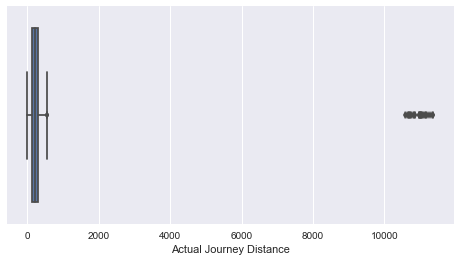

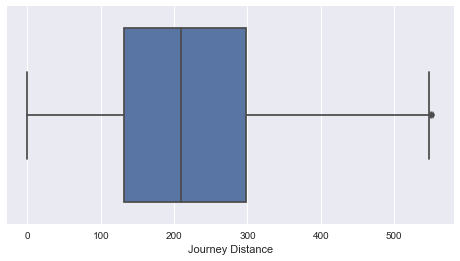

In [36]:
#let visualize the distribution of journey distance.

plt.figure(figsize=(8,4))
sns.boxplot(df['Actual Journey Distance'])

plt.figure(figsize=(8,4))
sns.boxplot(df['Journey Distance'])


The first charts is the boxplot of actual journey distance that we've calculated above, the second chart is the given journey distance. Apparently, those number which greater than 10000 are absolutely outlier. Because we get the number by using given destination latitude, longitude and origin latitude and longitude. 

Thus, maybe there is something wrong with the given coordinate. Let's see what is date of actual journey distance which have more than 10000

In [37]:
df[df['Actual Journey Distance'] >= 10000]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
348,ID1831371896,1.0,0.0,41.132,47.0,12.0,37.497205,-146.856861,-36.896114,144.983300,179.095,2018-06-02,10:25:32,172.47,13:18:00,88.31,172.47,0.00,10846.269,10667.174
389,ID5186608148,3.0,1.0,19.227,11.0,31.0,-38.199453,143.481381,38.070089,-146.869084,296.952,2018-05-06,12:00:50,247.66,16:08:29,217.97,247.65,0.01,11083.308,10786.356
394,ID5650672652,1.0,1.0,19.974,18.0,11.0,-37.254198,144.190351,38.314284,-143.528595,131.585,2018-07-23,23:36:34,128.62,01:45:11,147.26,128.62,0.00,11206.797,11075.212
419,ID1548620098,1.0,0.0,5.761,16.0,14.0,-37.648262,146.297288,38.593915,-145.377528,132.546,2018-04-11,12:21:34,129.50,14:31:04,94.91,129.50,0.00,10994.742,10862.196
421,ID1430674963,2.0,0.0,39.821,4.0,17.0,-38.489648,147.580275,38.591000,-148.296246,63.351,2018-03-26,01:18:54,63.52,02:22:25,141.53,63.52,0.00,10793.487,10730.136
2428,ID1869801596,1.0,0.0,26.259,29.0,27.0,-38.713484,146.386879,38.844606,-146.820239,40.340,2018-06-16,11:28:57,44.39,12:13:20,75.18,44.38,0.01,10996.909,10956.569
4462,ID1673180444,1.0,0.0,13.029,45.0,22.0,37.698847,-142.900816,-37.887564,145.504306,229.972,2018-05-18,19:21:22,219.44,23:00:48,102.94,219.43,0.01,11162.337,10932.365
4469,ID1358370378,3.0,0.0,40.515,26.0,39.0,-38.286068,144.410622,36.604936,-145.847839,226.166,2018-06-22,09:16:51,190.27,12:27:07,165.21,190.27,0.00,10987.100,10760.934
4498,ID5221577680,3.0,1.0,42.527,1.0,36.0,-37.919534,143.224953,36.666069,-146.953862,358.458,2018-07-08,04:25:32,297.53,09:23:03,243.70,297.52,0.01,10970.498,10612.040
6504,ID1239307604,3.0,0.0,51.738,41.0,40.0,36.637845,-144.437305,-36.567546,143.224262,108.684,2018-03-22,22:48:12,95.01,00:23:12,180.69,95.00,0.01,11043.426,10934.742


We notice that there might be something wrong. In the record has ID equal ID1831371896, the origin latitude is a positive number and the origin longitude is negative number.

We know that the given data involve to drone shipping in Victoria State. Look into the data which has Journey Distance less than 10000, it seem like all the latitude is a negative and longitude is positive number.

Let's examine first few origin latitude, longitude and destination latitude and longitude which has journey distance less than 10000, we'll see that the location is somewhere belong to Victoria state. 

In [38]:
import folium
from itertools import chain


df_less_10000 = df[df['Actual Journey Distance'] < 10000]

data_less_10000 = pd.DataFrame({
'origin_lat':list(np.array(df_less_10000['Origin Latitude']))[:10],
'origin_lon':list(np.array(df_less_10000['Origin Longitude']))[:10],
'dest_lat':list(np.array(df_less_10000['Destination Latitude']))[:10],
'dest_lon':list(np.array(df_less_10000['Destination Longitude']))[:10],
})

 
m=folium.Map(zoom_start=5,location=[data_less_10000['origin_lat'][0],data_less_10000['origin_lon'][0]])

 
# Add a marker per city of the data frame!
for i in range(len(data_less_10000)):
    folium.Marker([data_less_10000.iloc[i]['origin_lat'],data_less_10000.iloc[i]['origin_lon']],popup=str(i)).add_to(m)
    folium.Marker([data_less_10000.iloc[i]['dest_lat'], data_less_10000.iloc[i]['dest_lon']],\
                        icon=folium.Icon(color='purple'),popup=str(i) ).add_to(m)
m

Now, let's visualize those first latitude and longitude of origin which has journey distance greater than 10000


In [39]:
data_greater_10000 = df[df['Actual Journey Distance'] > 10000]

data_greater_10000 = pd.DataFrame({
'origin_lat':list(np.array(data_greater_10000['Origin Latitude']))[:10],
'origin_lon':list(np.array(data_greater_10000['Origin Longitude']))[:10],
'dest_lat':list(np.array(data_greater_10000['Destination Latitude']))[:10],
'dest_lon':list(np.array(data_greater_10000['Destination Longitude']))[:10],
})

 
m=folium.Map(zoom_start=5,location=[data_greater_10000['origin_lat'][0],data_greater_10000['origin_lon'][0]])

 
# Add a marker per city of the data frame!
for i in range(len(data_greater_10000)):
    folium.Marker([data_greater_10000.iloc[i]['origin_lat'], data_greater_10000.iloc[i]['origin_lon']]).add_to(m)
    folium.Marker([data_greater_10000.iloc[i]['dest_lat'], data_greater_10000.iloc[i]['dest_lon']],\
                        icon=folium.Icon(color='purple')).add_to(m)
m

Supprisingly, the locations are somewhere in the North Pacific Ocean. Let's see the range for origin region and destination region

In [40]:
print("Origin Latitude: Min = {0}, Max = {1}".format(df['Origin Latitude'].min(),df['Origin Latitude'].max()))
print("Origin Longitude: Min = {0}, Max = {1}".format(df['Origin Longitude'].min(),df['Origin Longitude'].max()))
print("Destination Latitude: Min = {0}, Max = {1}".format(df['Destination Latitude'].min(),df['Destination Latitude'].max()))
print("Destination Longitude: Min = {0}, Max = {1}".format(df['Destination Longitude'].min(),df['Destination Longitude'].max()))

Origin Latitude: Min = -39.006931, Max = 38.960558
Origin Longitude: Min = -148.331113, Max = 148.450619
Destination Latitude: Min = -39.006931, Max = 38.844606
Destination Longitude: Min = -148.296246, Max = 148.450619


As our data are about drone shipping in Melbourne, so the latitude must be a negative number and longitude must be a positive number. 

Let's going to modify.

In [41]:
df['Origin Latitude'] = df['Origin Latitude'].map(lambda x: x*-1 if x > 0 else x)
df['Origin Longitude'] = df['Origin Longitude'].map(lambda x: x*-1 if x < 0 else x)
df['Destination Latitude'] = df['Destination Latitude'].map(lambda x: x*-1 if x > 0 else x)
df['Destination Longitude'] = df['Destination Longitude'].map(lambda x: x*-1 if x < 0 else x)

actual_distance = distanceInKmBetweenEarthCoordinates(df)
df['Actual Journey Distance'] = actual_distance

df['Distance Diff'] = abs(df['Actual Journey Distance'] - df['Journey Distance'])

df.loc[df['Distance Diff']>0.1,'Journey Distance'] = df.loc[df['Distance Diff']>0.1]['Actual Journey Distance']

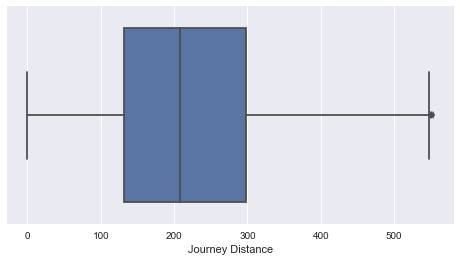

In [42]:
plt.figure(figsize=(8,4))
sns.boxplot(df['Journey Distance'])

By seeing the journey distance, we found the error of the given latitude and longitude. Now, we gonna do the same thing for the Travel time to see whether the given departure time and delivery time are wrong or not.

### 3.2 Analyzing Travel Time

Look in the boxplot bellow, the first chart is the actual travel time we get from the given departure time and delivery time and the second chart is about the travel time from the given data. Apparently, those have travel distance greater than 800 are might be outlier

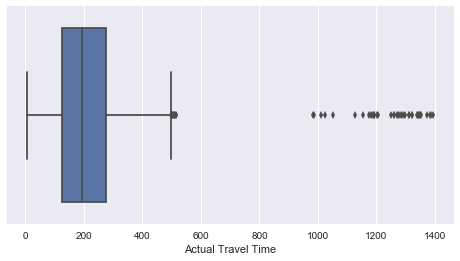

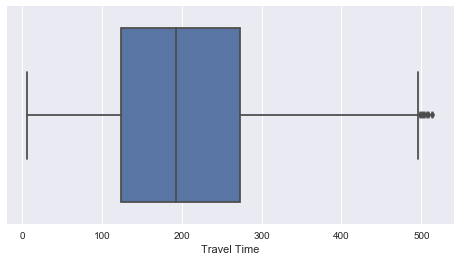

In [43]:
#let tvisualize the distribution of travel time.
plt.figure(figsize=(8,4))
sns.boxplot(df['Actual Travel Time'])

plt.figure(figsize=(8,4))
sns.boxplot(df['Travel Time'])

The first graph is about the travel time we calculate from delivery and departure time, the second graps visualize the given travel time from dataset. 

There is a huge significant difference between the given travel time and the calculated travel time. 

Let's see what is that data

In [44]:
df[df['Actual Travel Time'] > 800]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
791,ID1903595728,1.0,0.0,31.250,29.0,1.0,-38.801024,146.499734,-37.653354,143.378442,301.342,2018-06-16,06:23:54,285.32,01:38:35,121.94,1154.68,869.36,301.342,0.000000e+00
2783,ID5142624800,3.0,1.0,27.536,32.0,47.0,-37.447130,148.306090,-37.563346,147.115123,105.963,2018-01-10,01:26:32,92.81,23:53:44,228.49,1347.20,1254.39,105.963,0.000000e+00
2804,ID1760255978,1.0,0.0,25.512,25.0,26.0,-37.117883,147.396851,-38.335593,144.594177,281.522,2018-01-12,22:39:20,267.02,18:12:19,107.26,1172.98,905.96,281.522,0.000000e+00
2808,ID5228536106,1.0,1.0,33.291,27.0,17.0,-38.920698,146.862222,-38.759385,148.235690,120.431,2018-01-08,15:23:09,118.32,13:24:50,140.71,1321.68,1203.36,120.431,0.000000e+00
8918,ID5192683109,2.0,1.0,50.756,43.0,13.0,-36.531164,147.432102,-36.777017,146.409954,95.296,2018-05-23,18:13:52,92.13,16:41:45,171.63,1347.88,1255.75,95.296,0.000000e+00
8940,ID1150184874,1.0,0.0,59.154,36.0,18.0,-36.660726,146.818494,-37.251916,144.124974,248.459,2018-02-26,15:24:07,236.50,11:27:37,621.52,1203.50,967.00,248.459,0.000000e+00
8950,ID5895220748,1.0,1.0,31.197,46.0,40.0,-38.150003,148.384001,-36.556498,143.280768,485.072,2018-07-15,07:01:26,454.91,23:26:32,177.87,985.10,530.19,485.072,5.684342e-14
8963,ID1696923824,3.0,0.0,6.803,25.0,46.0,-37.069537,147.345510,-38.212348,148.287943,151.934,2018-02-14,15:21:12,130.08,13:11:08,172.18,1309.93,1179.85,151.934,0.000000e+00
9003,ID1995368443,2.0,0.0,30.640,27.0,43.0,-38.812175,146.879661,-36.597643,147.611695,254.804,2018-04-01,12:02:11,234.97,08:07:13,130.15,1205.03,970.06,254.803,1.000000e-03
9685,ID1934124786,1.0,0.0,12.073,30.0,27.0,-37.331821,146.768085,-39.003891,146.913501,186.564,2018-06-09,05:27:43,179.37,02:28:21,119.08,1260.63,1081.26,186.564,2.842171e-14


It looks like Departure Time and Delivery Time have been swapped as the Travel Time involved to more than 15 hours ( more than 900 minutes ), it is not plausible.

Let's try to swap those time 

In [45]:
# Get all the departure time and delivery time that greater than 900
departure_delivery = df[df['Actual Travel Time'] > 900][['Departure Time','Delivery Time']]

#Swap them
df.loc[(df['Actual Travel Time'] > 900),'Departure Time'] = departure_delivery['Delivery Time']
df.loc[(df['Actual Travel Time'] > 900),'Delivery Time'] = departure_delivery['Departure Time']

# Verify the data after swapping
departure_time = df['Departure Time'].map(lambda x: verify_time(x))
delivery_time = df['Delivery Time'].map(lambda x: verify_time(x))

# calculate the travel time from the new data
actual_travel_time = delivery_time.sub(departure_time,axis=0).map(lambda x: convert_time_to_minutes(x))
df['Actual Travel Time'] = actual_travel_time

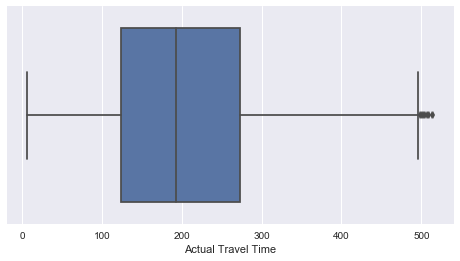

In [46]:
plt.figure(figsize=(8,4))
sns.boxplot(df['Actual Travel Time'])

We've been fix the issues of departure time and delivery time. The actual travel time is now similar to the given travel time. Let's see is there any different between those value. But before that, we will impute the null travel time. 

In [47]:
df.loc[df['Travel Time'].isnull(),'Travel Time'] = df.loc[df['Travel Time'].isnull()]['Actual Travel Time']

In [48]:
df['Time Diff'] = abs(df['Actual Travel Time'] - df['Travel Time'])
df[df['Time Diff'] > 1]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
2531,ID5575229589,1.0,1.0,20.975,9.0,19.0,-37.334106,143.832538,-37.067388,145.886781,184.543,2018-06-05,03:08:49,177.50,05:23:05,151.20,134.27,43.23,184.543,0.000000e+00
4858,ID1660531776,1.0,0.0,30.366,26.0,25.0,-38.358740,144.344739,-36.894312,147.234069,302.405,2018-07-11,05:16:26,286.30,06:03:12,133.05,46.77,239.53,302.405,0.000000e+00
7237,ID5277770729,1.0,1.0,26.843,29.0,33.0,-38.646334,146.358001,-36.887437,143.772692,300.129,2018-02-12,06:29:25,284.20,11:52:29,137.11,323.07,38.87,300.129,0.000000e+00
10709,ID1935302550,3.0,0.0,41.286,5.0,23.0,-38.010356,148.147720,-37.597894,143.989068,368.604,2018-02-02,21:18:11,305.76,03:15:04,205.67,356.88,51.12,368.604,5.684342e-14
12412,ID1357699091,3.0,0.0,38.308,18.0,45.0,-37.055091,144.330404,-37.689497,142.813807,151.613,2018-05-06,14:22:56,129.82,19:30:40,172.19,307.73,177.91,151.613,0.000000e+00
12756,ID1752682482,1.0,0.0,24.178,30.0,18.0,-37.109304,146.676020,-37.186335,144.337405,207.674,2018-03-17,19:59:20,198.85,00:34:48,101.33,275.47,76.62,207.674,0.000000e+00
14793,ID1412279876,2.0,0.0,29.216,16.0,23.0,-37.604630,146.257662,-37.690923,144.150550,185.962,2018-05-12,07:18:13,173.32,09:30:47,125.80,132.57,40.75,185.962,2.842171e-14
23008,ID1865056734,1.0,0.0,30.724,27.0,32.0,-38.901594,146.751282,-37.530260,148.385779,209.130,2018-06-01,11:40:46,200.20,12:08:02,88.94,27.27,172.93,209.130,0.000000e+00
24289,ID1656844060,1.0,0.0,24.476,1.0,47.0,-37.772809,143.268955,-37.578339,146.975785,327.288,2018-03-01,00:35:17,309.27,06:46:20,126.81,371.05,61.78,327.288,0.000000e+00
25415,ID1681903552,1.0,0.0,6.596,20.0,14.0,-37.148508,143.119720,-38.539164,145.349389,249.746,2018-06-07,02:46:54,237.69,03:22:55,119.74,36.02,201.67,249.746,2.842171e-14


We still see the significant difference between the given travel time and the actual travel time we've calculated above. The reason maybe because there are some incorrect value in Delivery Time. 

We'll fix this issuse latter when we encounter to see Drone Type.

Let's see the data for Package Weight

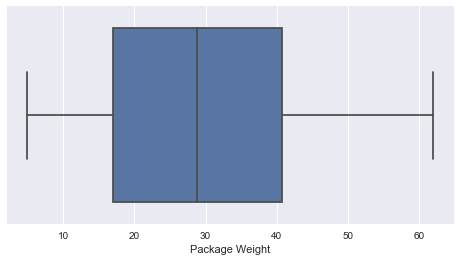

In [49]:
plt.figure(figsize=(8,4))
sns.boxplot(df['Package Weight'])

### 3.3 Analyzing Latitude and Longitude

We know that each Origin Region and Destination Region have a group of latitude and longitude. Now, we going to see if a specific coordinate belong to the wrong region. By saying belong wrong region, it means that from the given latitude and longitude, it should belong to other region instead of belong to a current region.

Let's see the distribution of Orign Region and its latitude and longitude.

<Figure size 1440x720 with 0 Axes>

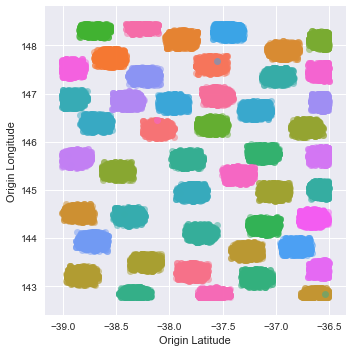

In [50]:
plt.figure(figsize=(20,10))
sns.lmplot(x='Origin Latitude',y='Origin Longitude', \
           hue='Origin Region', data=df,fit_reg=False, legend=False,scatter_kws={'alpha':0.5})

Obviously, there are two catching eye we can see from the graphs which are the wrong value of origin region the.
Let's take one origion region which have the incorrect coordinate to see what it is

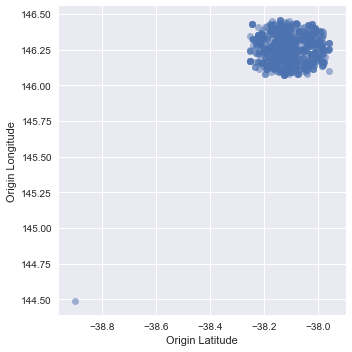

In [51]:
d = df[df['Origin Region']==2]
sns.lmplot(x='Origin Latitude',y='Origin Longitude', data=d,fit_reg=False, scatter_kws={'alpha':0.5})

Clearly, there is a wrong value of origin region which have code equal 2. These wrong value should belong to a difference origin code instead of 2.

Following is a function uses to fix the origin region based on its latitude and longitude

In [52]:
def fixing_code_origin(df_wrong_origin,df_origin):
    """
    This function use to fix the wrong origin region of specific latitude and longitude
    :param:
        df_wrong_origin: dataframe of wrong origin
        df_origin: dataframe contain only latitude and longitude
    """
    result = []
    df_wrong = df_wrong_origin[['Origin Latitude','Origin Longitude']]
    df_o = df_origin[['Origin Latitude','Origin Longitude']]
    
    # calculate distance between those latitude and longitude of two dataframe
    distance = cdist(df_wrong,df_o)
    for i in range(len(distance)):
        for k in range(len(distance[i])):
            # assign all the distance which equal 0 to a very large number
            if distance[i][k] == 0:
                distance[i][k] = 10000000000
    
    for i in range(len(distance)):
        # Get the index of the minumum number
        index = distance[i].argmin()
        # Get the origin code by using that index
        code = df_origin.iloc[index]['Origin Region']
        # Finally fix it
        df.loc[(df['Origin Region'] == df_wrong_origin.iloc[i]['Origin Region']) & \
                (df['Origin Latitude'] == df_wrong_origin.iloc[i]['Origin Latitude']) & \
                (df['Origin Longitude'] == df_wrong_origin.iloc[i]['Origin Longitude']),\
                  'Origin Region'] = code


In [53]:
df_orign = df[['Origin Region','Origin Latitude','Origin Longitude']]
#Get the unique code
origin_code = df_orign['Origin Region'].unique()
for code in origin_code:
    # fixing each signle code
    lat = df_orign[df_orign['Origin Region'] == code]['Origin Latitude']
    lon = df_orign[df_orign['Origin Region'] == code]['Origin Longitude']
    dist = cdist(np.asarray(list(zip(lat,lon))),np.asarray(list(zip(lat,lon)))).cumsum(axis=0)[-1]
    index = dist > len(lat)/2
    df_wrong_origin = df_orign[df_orign['Origin Region'] == code][index]
    if len(df_wrong_origin) > 0:
        fixing_code_origin(df_wrong_origin,df_orign)

Check it again

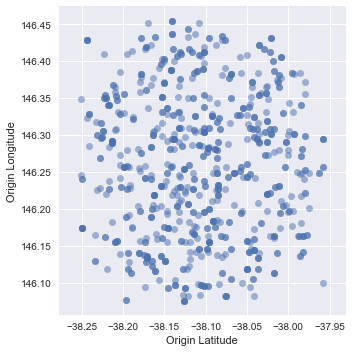

In [54]:
d = df[df['Origin Region']==2]
sns.lmplot(x='Origin Latitude',y='Origin Longitude', data=d,fit_reg=False, scatter_kws={'alpha':0.5})

Our data of origin region is now correct, let see the error from destination region and fix it.

<Figure size 1440x720 with 0 Axes>

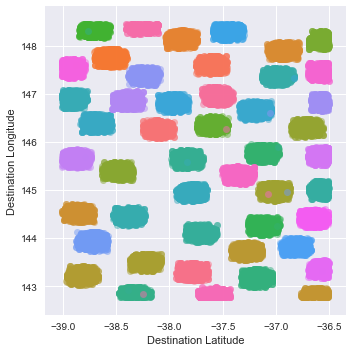

In [55]:
plt.figure(figsize=(20,10))
sns.lmplot(x='Destination Latitude',y='Destination Longitude', legend=False, \
           hue='Destination Region', data=df,fit_reg=False, scatter_kws={'alpha':0.5})

Again, there are several destination latitude and longitude have incorrect region. Do the same thing of what we have done for Origin Region to fix Destination Region 

In [56]:
def fixing_code_dest(df_wrong_dest,df_dest):
    df_wrong = df_wrong_dest[['Destination Latitude','Destination Longitude']]
    df_o = df_dest[['Destination Latitude','Destination Longitude']]
    distance = cdist(df_wrong,df_o)
    for i in range(len(distance)):
        for k in range(len(distance[i])):
            if distance[i][k] == 0:
                distance[i][k] = 10000000000
    for i in range(len(distance)):
        index = distance[i].argmin()
        code = df_dest.iloc[index]['Destination Region']
        df.loc[(df['Destination Region'] == df_wrong_dest.iloc[i]['Destination Region']) & \
                (df['Destination Latitude'] == df_wrong_dest.iloc[i]['Destination Latitude']) & \
                (df['Destination Longitude'] == df_wrong_dest.iloc[i]['Destination Longitude']),\
                  'Destination Region'] = code


In [57]:
df_dest = df[['Destination Region','Destination Latitude','Destination Longitude']]
dest_code = df_dest['Destination Region'].unique()
for code in dest_code:
    lat = df_dest[df_dest['Destination Region'] == code]['Destination Latitude']
    lon = df_dest[df_dest['Destination Region'] == code]['Destination Longitude']
    dist = cdist(np.asarray(list(zip(lat,lon))),np.asarray(list(zip(lat,lon)))).cumsum(axis=0)[-1]
    index = dist > len(lat)/3
    df_wrong_dest = df_dest[df_dest['Destination Region'] == code][index]
    if len(df_wrong_dest) > 0:
        fixing_code_dest(df_wrong_dest,df_dest)

<Figure size 1440x720 with 0 Axes>

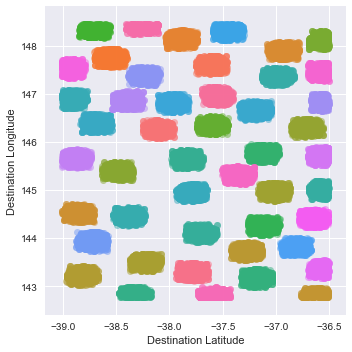

In [58]:
plt.figure(figsize=(20,10))
sns.lmplot(x='Destination Latitude',y='Destination Longitude', legend=False, \
           hue='Destination Region', data=df,fit_reg=False, scatter_kws={'alpha':0.5})

### 3.3 Analyzing Delivery Fare.

Delivery Fare is one of the most important features of this datasets that we need to dig deep investigation and study the presence of its outliers.

We first will look in how is the fare for each type of drone and then going to visualize to see the relationship between Delivery Fare, Drone Type, Post Type, Package Weight as well as Journey Distance and Travel Time.

#### 3.3.1. Descriptive Statistics Fare

First, let's see how many drone type and how many post type of datasets

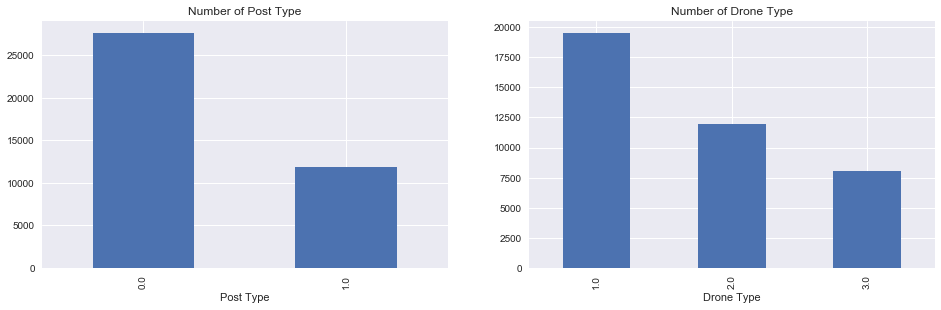

In [59]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.xlabel("Post Type")
plt.title("Number of Post Type")
df['Post Type'].value_counts().plot(kind='bar')

plt.subplot(2,2,2)
plt.xlabel("Drone Type")
plt.title("Number of Drone Type")
df['Drone Type'].value_counts().plot(kind='bar')

We can see that the Post Type 0 is almost twice of Post Type 1 and Drone Type 1 is approximately total of drone type 2 and drone type 3. From the section 1, we know that Post Type have a relationship with ID, however, we haven't figure out what is relationship of Drone Type to other features.


We gonna see the average price, average distance and average time for particular post type and drone type

In [60]:
#Average Price
average_post_type = df.groupby("Post Type").agg({"Id":"count","Package Weight":"mean","Delivery Fare":"mean",\
                                                "Travel Time":"mean"}).rename(columns={"Id":"Count","Package Weight":"Avg Weight","Delivery Fare":\
                                                "Avg Fare","Travel Time":"Avg Time"})
average_post_type

,Count,Avg Weight,Avg Fare,Avg Time
Post Type,,,,
0.0,27651,28.936619,137.610208,203.903562
1.0,11842,28.679617,175.497596,202.873983


and for Drone Type

In [61]:
average_drone_type = df.groupby("Drone Type").agg({"Id":"count","Delivery Fare":"mean","Journey Distance":"mean",\
                                                "Travel Time":"mean"}).rename(columns={"Id":"Count","Delivery Fare":\
                                                "Avg Fare","Journey Distance":"Avg Distance","Travel Time":"Avg Time"})
average_drone_type

,Count,Avg Fare,Avg Distance,Avg Time
Drone Type,,,,
1.0,19554,122.498107,220.963051,211.102683
2.0,11917,160.199443,219.133820,203.028042
3.0,8012,196.875411,221.015156,186.093344


#### 3.3.2 Delivery Fare Exploration

Let's see the correlation between those variable

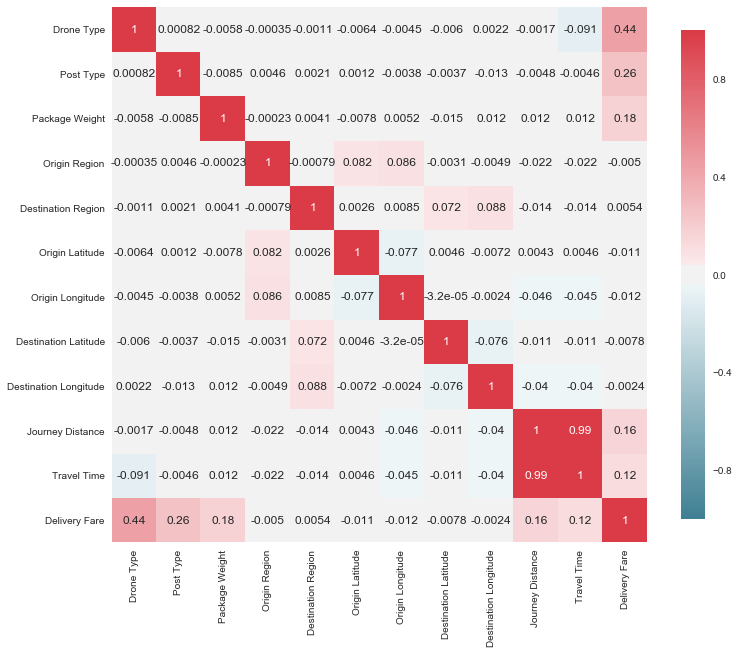

In [62]:
corr = df.drop(['Actual Travel Time','Actual Journey Distance','Time Diff','Distance Diff'],axis=1).corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
plt.figure(figsize =( 12 , 10 ))
sns.heatmap(corr,cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 })


Apparently, Drone Type, Post Type and Package Weight are contributed more to the Delivery Fare than other factor.

We also notice that Travel Time and Journey Distance are perfectly symmetric as more distance a drone need to travel, more
time it costs.

Taken drone type, post type, package weight, travel time and delivery fare to consideration.

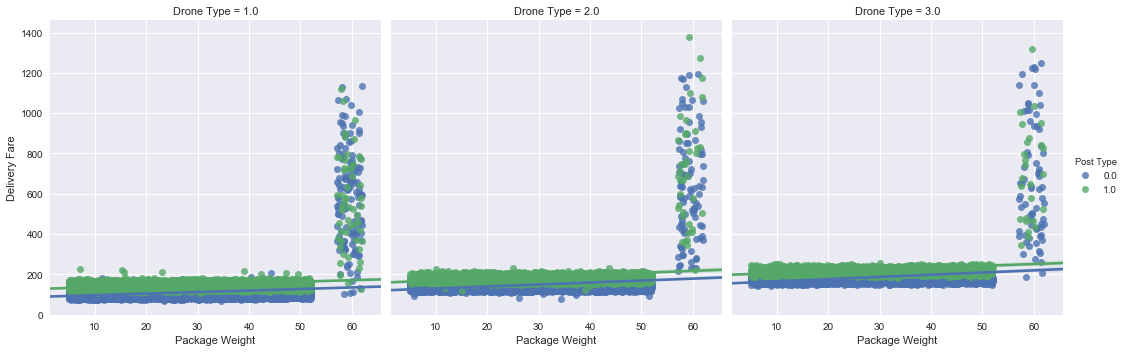

In [63]:
sns.lmplot(x='Package Weight',y='Delivery Fare', col='Drone Type', hue="Post Type", data=df)

It seems like the data sperate into different type, when the data have package weight greater than 55 are totally different delivery fare in comparison to the data which have package weight less than 55.

This could be two different rules of fare for drone shipping based on package weight of stuff: one for package less than 55 and one for package weight greater than 55 or maybe all the data involve to have package weight greater than 55 are outlier.

Let's see how the delivery fare varies in term of travel time

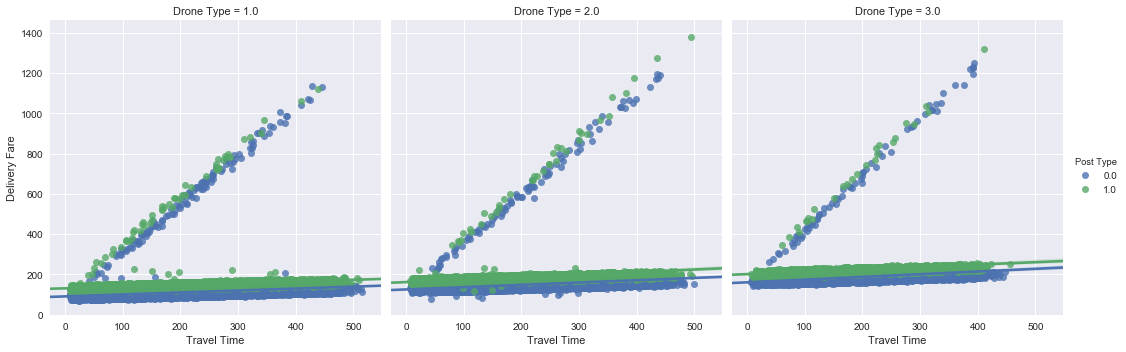

In [64]:
sns.lmplot(x='Travel Time',y='Delivery Fare', col='Drone Type', hue="Post Type", data=df)

and in term of Journey Distance

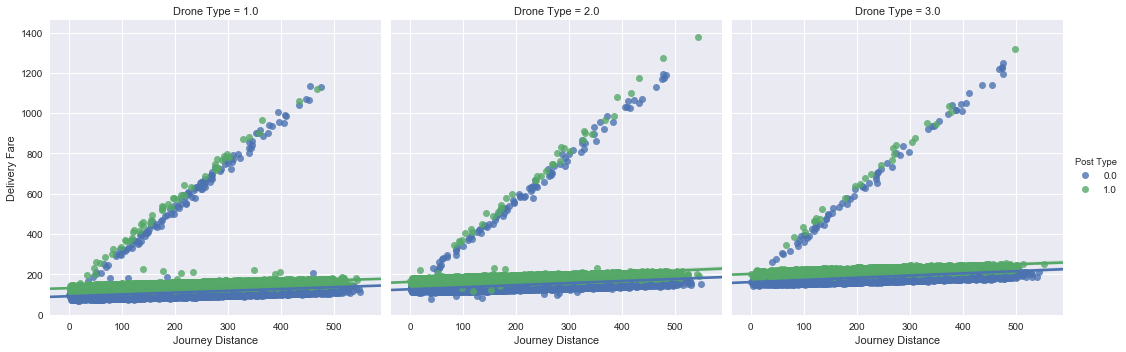

In [65]:
sns.lmplot(x='Journey Distance',y='Delivery Fare', col='Drone Type', hue="Post Type", data=df)

All the data involve to the delivery fare that greater than 300 seem like have a perfect linear relation to the either travel time or journey distance. 
As we mentioned before, those data could be involved to the package weight greater than 55 in comparision to those data that have delivery fare less than 300. 

For all the data that have package weight greater than 55, it could be outlier. Take that data into consideration


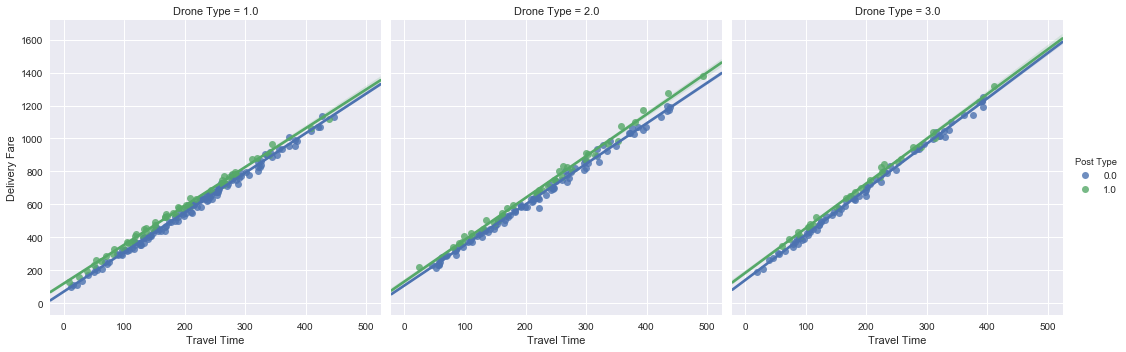

In [66]:
df_ = df[df['Package Weight'] > 55]
sns.lmplot(x='Travel Time',y='Delivery Fare', col='Drone Type', hue="Post Type", data=df_)

In [67]:
print("Min weight:",df[df['Package Weight']>55]['Package Weight'].min())
print("Max weight:",df[df['Package Weight']>55]['Package Weight'].max())

print("Min Fare:",df[df['Package Weight'] > 55]['Delivery Fare'].min())
print("Min Fare:",df[df['Package Weight'] > 55]['Delivery Fare'].max())

Min weight: 57.025
Max weight: 61.986999999999995
Min Fare: 100.36
Min Fare: 1380.42


Why does the Travel Time have a nearly perfect linear with Delivery Fare of the data that have package weight greater than 55 ?

Probably, there is something wrong with those data. As we can see from the previous chart, while the fare of the package weight that less than 55 increase smoothly when the package weight increase, the fare of the package weight greater than 55 soar up irrational. The package weight are only around 57 to 62 but the fare is in the range from 100 to 1380. 

That seems not plausible as the increasing weight does not rational with the increasing fare.

Maybe because of the drone cary the package weight need to travel more than the other drone? 

Let's see how those data look like

In [68]:
df[df['Package Weight']>55]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff
244,ID1854906630,1.0,0.0,57.433,25.0,24.0,-36.941570,147.314656,-36.561821,144.877492,221.439,2018-03-04,08:13:47,211.56,11:45:20,548.63,211.55,0.01,221.439,2.842171e-14
335,ID1476777294,2.0,0.0,60.521,10.0,21.0,-38.772053,143.268531,-38.276138,142.979779,60.662,2018-02-18,05:33:49,61.11,06:34:55,276.40,61.10,0.01,60.662,0.000000e+00
428,ID1111704890,1.0,0.0,60.234,44.0,44.0,-37.313308,145.241635,-37.300999,145.428102,16.567,2018-07-09,11:12:34,22.45,11:35:00,111.36,22.43,0.02,16.567,0.000000e+00
469,ID5493198644,1.0,1.0,60.137,12.0,14.0,-37.031856,145.137805,-38.573038,145.516517,174.763,2018-05-01,03:09:19,168.47,05:57:47,522.68,168.47,0.00,174.763,0.000000e+00
598,ID5315870149,2.0,1.0,58.158,25.0,27.0,-36.916704,147.451396,-38.990016,146.907793,235.674,2018-04-04,15:04:36,217.84,18:42:26,669.12,217.83,0.01,235.674,0.000000e+00
623,ID1991783092,1.0,0.0,58.228,17.0,34.0,-38.804682,148.434085,-38.748476,144.109777,375.290,2018-03-23,14:40:30,353.58,20:34:04,902.10,353.57,0.01,375.290,0.000000e+00
686,ID1916889056,2.0,0.0,60.987,7.0,44.0,-38.786755,144.384865,-37.283150,145.357590,187.850,2018-02-06,06:41:16,175.01,09:36:16,538.22,175.00,0.01,187.850,0.000000e+00
718,ID1999353030,2.0,0.0,59.544,27.0,34.0,-38.892611,146.815354,-38.699074,143.829146,259.962,2018-06-22,03:08:09,239.59,07:07:44,721.04,239.58,0.01,259.962,0.000000e+00
811,ID5311580829,1.0,1.0,61.394,10.0,34.0,-38.788220,143.367281,-38.592568,143.840837,46.554,2018-01-15,15:14:02,50.13,16:04:09,231.73,50.12,0.01,46.554,7.105427e-15
888,ID5505042810,1.0,1.0,58.249,15.0,34.0,-36.536504,148.117331,-38.714919,144.017976,435.159,2018-04-19,11:20:20,408.84,18:09:10,1061.20,408.83,0.01,435.159,0.000000e+00


Because the Post Type equal 0 represents for normal delivery, and Post Type equal 1 mean express delivery thus we'll group those data based on Post Type

In [69]:
df_1 = df[(df['Post Type']==1) & (df['Package Weight'] > 55)][['Package Weight','Journey Distance','Delivery Fare']]
df_1 = df_1.reset_index().drop(['index'],axis=1)

Consider Package Weight, Journey Distance and Delivery Fare of the Post Type 1.

We know that drone shipping have its price based on how many weight it carry on and how far and how long does it need to travel. We now are going to calculate the rate pricing for each 1 unit of journey distance per 1 unit of package weight.

However, for all the drone shipping that have package weight greater than 55, it looks like the delivery fare really depend on the travel time or journey distance. Cause as we can see, the range for package weight just increase 5 unit while the fare are very huge range from 100 to 1380 and the nearly perfect linear of Journey Distance againist Delivery Fare we've seen above

Thus, we will get the rate pricing drone shipping based on Journey Distance

In [70]:
df_1['Rate Pricing'] = df_1['Delivery Fare'] / df_1['Journey Distance']

In [71]:
df_1 = df_1.sort_values(['Journey Distance']).reset_index().drop(['index'],axis=1)
df_1

,Package Weight,Journey Distance,Delivery Fare,Rate Pricing
0,61.856,2.039,129.31,63.418342
1,60.358,18.302,219.94,12.017266
2,59.229,20.484,159.15,7.769479
3,57.591,34.797,197.61,5.678938
4,61.394,46.554,231.73,4.977660
5,61.559,50.385,259.53,5.150938
6,57.717,59.578,254.10,4.264997
7,57.467,65.871,345.93,5.251628
8,59.218,67.828,283.83,4.184555
9,58.288,80.983,300.80,3.714360


Remove the first three rows, it is absolutely ouliter

In [72]:
df_1 = df_1.loc[3:len(df_1)]
df_1.corr()

,Package Weight,Journey Distance,Delivery Fare,Rate Pricing
Package Weight,1.000000,0.034575,0.080707,0.064472
Journey Distance,0.034575,1.000000,0.990689,-0.779890
Delivery Fare,0.080707,0.990689,1.000000,-0.735178
Rate Pricing,0.064472,-0.779890,-0.735178,1.000000


It seem like the more distance the drone need to travel, the more cost does it takes, but the rate pricing descrease. That is not feasible as we expect that rate pricing should be stable. Even when you look to data in more detail, we see that there are some value have less package weight, less travel time as well as journey distance but higher fare. 

Thus, we can safely say those data are absolutely outlier. 

Even when we assume that the rate pricing for those data is correct. We can apply this rate pricing to the data that have package weight less than 55 to see the differences.

In [73]:
rate_pricing = df_1['Rate Pricing'].mean()

df_test = df.copy()
df_test['Calculation Fare'] = df_test['Journey Distance'] * rate_pricing
df_test[['Package Weight','Journey Distance','Travel Time','Delivery Fare','Calculation Fare']]

,Package Weight,Journey Distance,Travel Time,Delivery Fare,Calculation Fare
0,48.361,455.704,427.80,175.89,1435.204209
1,9.767,418.806,393.74,129.57,1318.996836
2,31.081,339.034,281.78,188.84,1067.761143
3,22.683,296.208,272.05,154.03,932.883996
4,45.041,306.271,281.06,161.66,964.576630
5,46.525,357.863,337.49,151.35,1127.061610
6,25.102,112.787,111.26,91.23,355.213861
7,19.284,458.674,430.55,156.31,1444.557993
8,26.771,242.356,223.83,138.93,763.281322
9,6.174,355.541,335.35,150.54,1119.748652


Obviously, there is a huge difference between the given fare and the calculation fare. 

The reason because the delivery fare not only depend on journey distance, but it is also depend on package weight as well. Rather than that, it could be depend on the location the drone take off or landing to calculate the fare, while the package weight greater than 55 only depend on Journey Distance.

By now, we will remove those ouliter out of the given dataset.

But first, Let's see the distribution of delivery fare

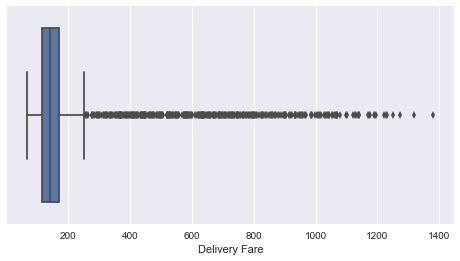

In [74]:
#let's visualize the distribution of delivery fare
plt.figure(figsize=(8,4))
sns.boxplot(df['Delivery Fare'])

There is a vast amount of outlier of delivery fare. However, as the fare a measure by currency, we should normalize delivery fare the log10 number it before decide whether to remove those outlier or not.

More detail about Log Transformations:

https://www.r-statistics.com/2013/05/log-transformations-for-skewed-and-wide-distributions-from-practical-data-science-with-r/

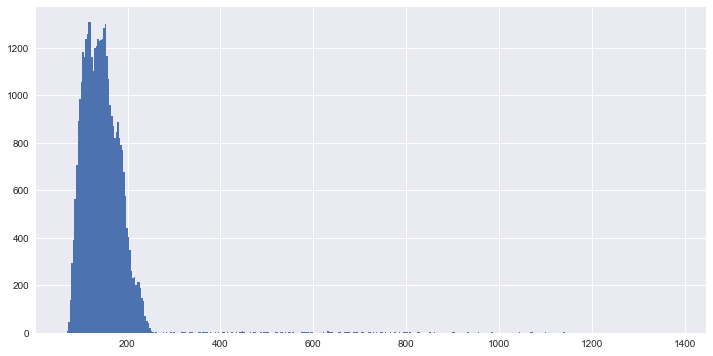

In [75]:
plt.figure(figsize=(12,6))
df['Delivery Fare'].hist(bins=400)

Look in the histogram above, skewed so most of the mass is on the left. 

Now, let normalize the delivery fare to the log number

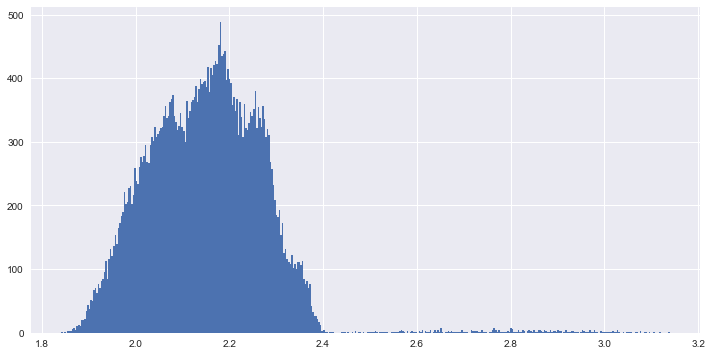

In [76]:
df['Delivery Norm'] = np.log10(df[['Delivery Fare']])
plt.figure(figsize=(12,6))
df['Delivery Norm'].hist(bins=400)

Let's see the data that have Delivery Norm less than 2.4

In [77]:
df[df['Delivery Norm'] < 2.4]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff,Delivery Norm
0,ID5389656788,1.0,1.0,48.361,15.0,11.0,-36.611716,148.014884,-38.348180,143.342324,...,2018-03-24,00:37:24,427.80,07:45:12,175.89,427.80,0.00,455.704,0.000000e+00,2.245241
1,ID1247245215,1.0,0.0,9.767,9.0,46.0,-37.386395,143.777755,-38.335037,148.389769,...,2018-07-26,04:09:17,393.74,10:43:01,129.57,393.73,0.01,418.806,0.000000e+00,2.112504
2,ID1608889381,3.0,0.0,31.081,8.0,2.0,-36.570318,142.820171,-38.010240,146.193967,...,2018-06-24,14:18:53,281.78,19:00:39,188.84,281.77,0.01,339.034,0.000000e+00,2.276094
3,ID1823716073,2.0,0.0,22.683,30.0,34.0,-37.159821,146.639043,-38.764968,143.946865,...,2018-04-12,03:20:18,272.05,07:52:21,154.03,272.05,0.00,296.208,5.684342e-14,2.187605
4,ID1878258410,2.0,0.0,45.041,29.0,20.0,-38.668790,146.317208,-37.271839,143.310111,...,2018-06-22,04:39:12,281.06,09:20:15,161.66,281.05,0.01,306.271,5.684342e-14,2.208603
5,ID5579399991,1.0,1.0,46.525,23.0,32.0,-37.756942,144.284672,-37.553672,148.337509,...,2018-04-11,20:21:02,337.49,01:58:31,151.35,337.48,0.01,357.863,5.684342e-14,2.179982
6,ID1912669892,NaN,0.0,25.102,37.0,3.0,-38.415790,146.834953,-37.642361,147.665896,...,2018-01-24,15:08:18,111.26,16:59:33,91.23,111.25,0.01,112.787,0.000000e+00,1.960138
7,ID5923304990,1.0,1.0,19.284,10.0,46.0,-38.837953,143.156875,-38.196759,148.359763,...,2018-04-22,19:24:02,430.55,02:34:35,156.31,430.55,0.00,458.675,1.000000e-03,2.193987
8,ID1921090207,2.0,0.0,26.771,44.0,21.0,-37.347241,145.216541,-38.406334,142.806483,...,2018-05-10,17:34:56,223.83,21:18:45,138.93,223.82,0.01,242.356,0.000000e+00,2.142796
9,ID5732983765,1.0,1.0,6.174,41.0,32.0,-36.610068,144.509118,-37.505355,148.351336,...,2018-06-01,19:36:49,335.35,01:12:10,150.54,335.35,0.00,355.541,0.000000e+00,2.177652


Look in the data above, all the records involved to Delivery Norm that less than 2.4 seem like have delivery fare less than 300

We'll remove the data that have delivery fare greater than 300


In [78]:
df = df[(df['Delivery Fare'] < 300) | (df['Delivery Fare'].isnull())]

#### 3.3.3 Fare Outlier Removing

Let's visualize the remain data

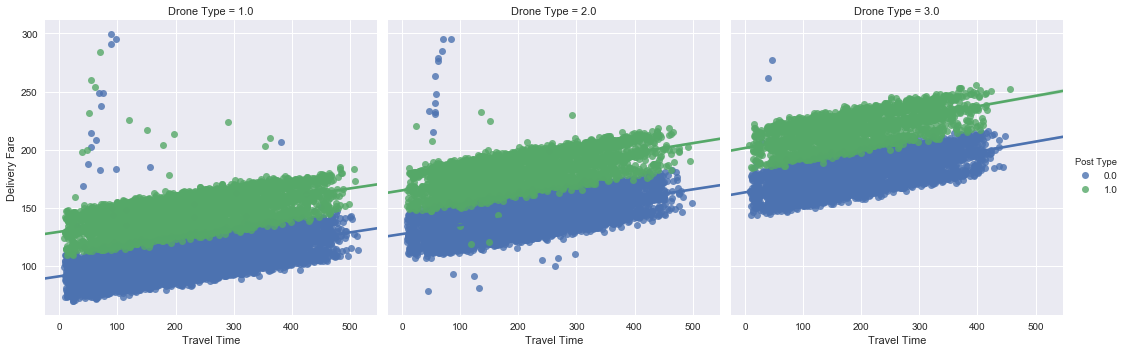

In [79]:
sns.lmplot(x='Travel Time',y='Delivery Fare', col='Drone Type', hue="Post Type", data=df)

It seems like the outlier happend drone type 1 and 2 rather than for drone type 3. From the chart, we see that Post Type equal 1 are always have higher fare than Post Type equal 0. That is plausible cause the post type = 1 mean the express delivery while post type equal 0 mean normal.

Let's see for each single type of drone 

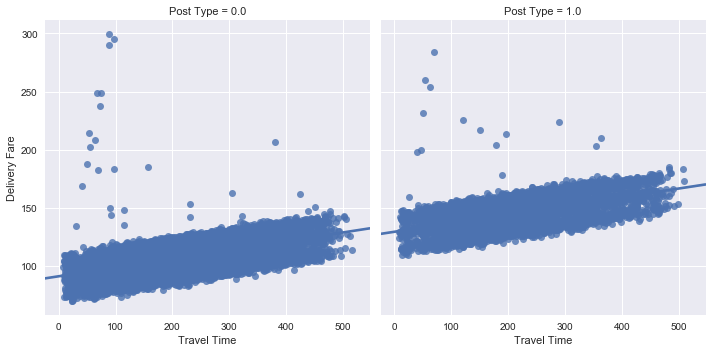

In [80]:
sns.lmplot(x='Travel Time',y='Delivery Fare', col ='Post Type', data=df[df['Drone Type'] == 1])

Let's remove those outlier.

First, we remove outlier of drone type equal 1

In [81]:
# for Post Type = 0 and Drone Type = 1.
df = df.drop(df[(df['Post Type']==0)&(df['Delivery Fare']>150)&(df['Drone Type']==1)].index)
df = df.drop(df[(df['Post Type']==0)&(df['Delivery Fare']>130)&(df['Drone Type']==1) \
                   &(df['Travel Time']<150)].index)
df = df.drop(df[(df['Post Type']==0)&(df['Delivery Fare']>140)&(df['Drone Type']==1)\
                 &(df['Travel Time']>200) &(df['Travel Time']<320)].index)
# df = df.drop(df[(df['Post Type']==0) &(df['Deli'])])
# for Post Type = 1 and Drone Type = 1
df = df.drop(df[(df['Post Type']==1)&(df['Delivery Fare']>190)&(df['Drone Type']==1)].index)
df = df.drop(df[(df['Post Type']==1)&(df['Delivery Fare']>155)&(df['Drone Type']==1)\
                   &(df['Travel Time']<50)].index)
df = df.drop(df[(df['Post Type']==1)&(df['Delivery Fare']>170)&(df['Drone Type']==1)\
                 &(df['Travel Time']<200) ].index)

Let's see the outlier of drone type equal 2 and remove it

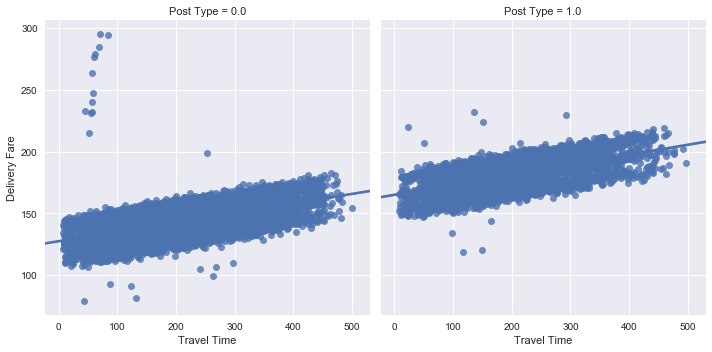

In [82]:
sns.lmplot(x='Travel Time',y='Delivery Fare', col ='Post Type', data=df[df['Drone Type'] == 2])

In [83]:
# for Post Type = 0 and Drone Type = 2.

df = df.drop(df[(df['Post Type']==0)&(df['Delivery Fare']>190)&(df['Drone Type']==2)].index)
df = df.drop(df[(df['Post Type']==0)&(df['Delivery Fare']<100)&(df['Drone Type']==2)].index)
df = df.drop(df[(df['Post Type']==0)&(df['Delivery Fare']<115)&(df['Drone Type']==2)\
                 &(df['Travel Time']>200) &(df['Travel Time']<320)].index)
# df = df.drop(df[(df['Post Type']==0)&(df['Delivery Fare']>160)&(df['Drone Type']==2)\
#                  &(df['Travel Time']<100)].index)
# for Post Type = 1 and Drone Type = 1
df = df.drop(df[(df['Post Type']==1)&(df['Delivery Fare']>200)&(df['Drone Type']==2) \
                   &(df['Travel Time']<100)].index)
df = df.drop(df[(df['Post Type']==1)&(df['Delivery Fare']>220)&(df['Drone Type']==2)\
                 &(df['Travel Time']>100) &(df['Travel Time']<300)].index)
df = df.drop(df[(df['Post Type']==1)&(df['Delivery Fare']<150)&(df['Drone Type']==2)\
                 &(df['Travel Time']>90)].index)

and for drone type equal 3

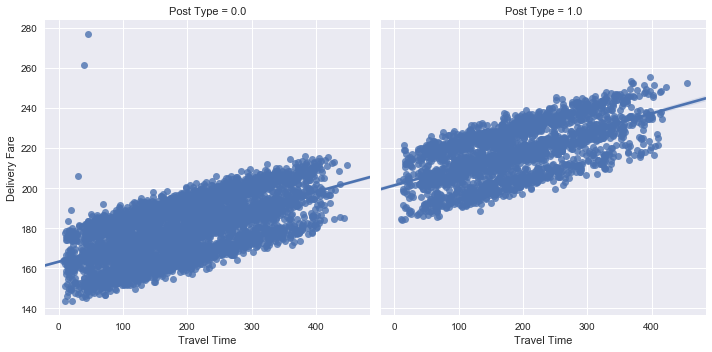

In [84]:
sns.lmplot(x='Travel Time',y='Delivery Fare', col ='Post Type', data=df[df['Drone Type'] == 3])

In [85]:
df = df.drop(df[(df['Post Type']==0)&(df['Travel Time']<100)&(df['Drone Type']==3)\
                   &(df['Delivery Fare']>200)].index)

By now, we are already remove all the outlier of delivery fare. We are going to impute null delivery fare in the next few section.

#### 3.3.4 Dealing with Missing Drone Type.

From the description, we know that drone type is a categorical for the type of drone. And each drone type has three different phases ( takeOff, routing and landing ) and different speed at different phases for each drone type. The takeOff and landing phases take only 5 minutes for each. 

From the given data, we have journey distance, and travel time. We will assume that all drone type take 10 minutes for takeOff and landing, and we'll calculate the routing speed to see whether any correlation between those speed to the Drone Type.

Step by step, we will get dataframe for each type of the drone.

In [86]:
df[df['Time Diff']>1]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Actual Travel Time,Time Diff,Actual Journey Distance,Distance Diff,Delivery Norm
2531,ID5575229589,1.0,1.0,20.975,9.0,19.0,-37.334106,143.832538,-37.067388,145.886781,...,2018-06-05,03:08:49,177.50,05:23:05,151.20,134.27,43.23,184.543,0.000000e+00,2.179552
4858,ID1660531776,1.0,0.0,30.366,26.0,25.0,-38.358740,144.344739,-36.894312,147.234069,...,2018-07-11,05:16:26,286.30,06:03:12,133.05,46.77,239.53,302.405,0.000000e+00,2.124015
7237,ID5277770729,1.0,1.0,26.843,29.0,33.0,-38.646334,146.358001,-36.887437,143.772692,...,2018-02-12,06:29:25,284.20,11:52:29,137.11,323.07,38.87,300.129,0.000000e+00,2.137069
10709,ID1935302550,3.0,0.0,41.286,5.0,23.0,-38.010356,148.147720,-37.597894,143.989068,...,2018-02-02,21:18:11,305.76,03:15:04,205.67,356.88,51.12,368.604,5.684342e-14,2.313171
12412,ID1357699091,3.0,0.0,38.308,18.0,45.0,-37.055091,144.330404,-37.689497,142.813807,...,2018-05-06,14:22:56,129.82,19:30:40,172.19,307.73,177.91,151.613,0.000000e+00,2.236008
12756,ID1752682482,1.0,0.0,24.178,30.0,18.0,-37.109304,146.676020,-37.186335,144.337405,...,2018-03-17,19:59:20,198.85,00:34:48,101.33,275.47,76.62,207.674,0.000000e+00,2.005738
14793,ID1412279876,2.0,0.0,29.216,16.0,23.0,-37.604630,146.257662,-37.690923,144.150550,...,2018-05-12,07:18:13,173.32,09:30:47,125.80,132.57,40.75,185.962,2.842171e-14,2.099681
23008,ID1865056734,1.0,0.0,30.724,27.0,32.0,-38.901594,146.751282,-37.530260,148.385779,...,2018-06-01,11:40:46,200.20,12:08:02,88.94,27.27,172.93,209.130,0.000000e+00,1.949097
24289,ID1656844060,1.0,0.0,24.476,1.0,47.0,-37.772809,143.268955,-37.578339,146.975785,...,2018-03-01,00:35:17,309.27,06:46:20,126.81,371.05,61.78,327.288,0.000000e+00,2.103154
25415,ID1681903552,1.0,0.0,6.596,20.0,14.0,-37.148508,143.119720,-38.539164,145.349389,...,2018-06-07,02:46:54,237.69,03:22:55,119.74,36.02,201.67,249.746,2.842171e-14,2.078239


In [87]:
drt_1 = df[(df['Drone Type']==1) ].reset_index().drop(["index"],axis=1)
drt_2 = df[(df['Drone Type']==2) ].reset_index().drop(["index"],axis=1)
drt_3 = df[(df['Drone Type']==3) ].reset_index().drop(["index"],axis=1)

We assume all the takeOff and landing phases take  5 minutes for each, thus:

$5x + 5y + (t-10)z = distance$
```
with x is speed of takeOff
     y is speed of landing
     z is speed of routing
     t is travel time
```

The only variable we need to calculate is $z$. 

We will get the data that have Time Difference and Journey Difference between the given dataset and the data we calculate equal 0 and use that data to apply to the equation above


In [88]:
drt_1[(drt_1['Time Diff']==0) & (drt_1['Distance Diff']==0)][['Travel Time','Journey Distance']]

,Travel Time,Journey Distance
0,427.80,455.704
4,335.35,355.541
6,290.25,306.683
12,50.10,46.530
14,296.97,313.971
20,135.75,139.309
23,259.37,273.230
25,55.60,52.485
28,212.25,222.188
29,195.57,204.118


Now, let solve the equation :
```
    $5x + 5y + 417.8z = 455.704$
    $5x + 5y + 325.35z = 355.541$
```

So we can easily get the $z = 1.0834$ and $5x + 5y = 3.0474$

Now, we will get the new journey distance based on the the result from the formula above, let's see is there any different between them


In [89]:
dt_1_takeOff_landing = 3.0474 
dt_1_routing_speed = 1.0834 

drt_1["New Travel Time"] = (((drt_1['Journey Distance']) - dt_1_takeOff_landing)/dt_1_routing_speed ) + 10
drt_1['Time Diff 2'] = abs(drt_1['New Travel Time'] - drt_1['Travel Time'])
drt_1[drt_1['Time Diff 2'] > 1][['Travel Time','Actual Travel Time','Journey Distance','New Travel Time','Distance Diff','Time Diff','Time Diff 2']]

,Travel Time,Actual Travel Time,Journey Distance,New Travel Time,Distance Diff,Time Diff,Time Diff 2
57,42.64,42.63,40.030,44.135684,0.000000e+00,0.01,1.495684
10361,318.77,318.77,348.379,328.748016,0.000000e+00,0.00,9.978016
11318,321.63,321.62,351.572,331.695219,5.684342e-14,0.01,10.065219
16387,182.27,182.27,195.955,188.057596,0.000000e+00,0.00,5.787596


As we can see, when we get the New Travel Time and New Journey Distance and compare to the given travel time and given journey distance, there are only 4 rows are different, which is a very minor data.

Do the same thing for the drone type 2 and drone type 3.

In [90]:
drt_2[(drt_2['Time Diff']==0) & (drt_2['Distance Diff']==0)][['Travel Time','Journey Distance']]

,Travel Time,Journey Distance
5,153.40,163.708
11,444.72,489.017
15,320.72,350.559
21,306.87,335.090
34,86.25,88.730
35,160.00,171.085
45,344.37,376.960
59,144.92,154.247
62,47.85,45.845
63,260.02,282.768


Solve the equation
```
    5x + 5y + 143.40z = 163.708
    5x + 5y + 434.72z = 489.017
```
We get the result $5x + 5y = 3.5772$ and $z = 1.1167$

In [91]:
dt_2_takeOff_landing = 3.5772
dt_2_routing_speed = 1.1167

drt_2["New Travel Time"] = (((drt_2['Journey Distance']) - dt_2_takeOff_landing)/dt_2_routing_speed ) + 10
drt_2['Time Diff 2'] = abs(drt_2['New Travel Time'] - drt_2['Travel Time'])
drt_2[drt_2['Time Diff 2'] > 1][['Travel Time','Actual Travel Time','Journey Distance','New Travel Time','Distance Diff','Time Diff','Time Diff 2']]


,Travel Time,Actual Travel Time,Journey Distance,New Travel Time,Distance Diff,Time Diff,Time Diff 2
1363,214.36,214.35,255.875,235.931584,0.000000e+00,0.01,21.571584
2569,308.66,308.65,326.636,299.297752,5.684342e-14,0.01,9.362248
3845,198.24,198.23,207.014,192.176771,0.000000e+00,0.01,6.063229


For the drone type, only 3 rows are different to the given data.

Let's calculate for the drone type 3

In [92]:
drt_3[(drt_3['Time Diff']==0) & (drt_3['Distance Diff']==0)][['Travel Time','Journey Distance']]

,Travel Time,Journey Distance
2,11.22,5.343
3,208.12,248.185
5,261.37,313.860
6,169.92,201.072
9,85.07,96.416
12,123.32,143.593
14,266.87,320.638
15,117.25,136.108
25,167.90,198.576
26,283.07,340.624


Solve the equation
```
    $5x + 5y + 198.12z = 248.185$
    $5x + 5y + 251.37z = 313.860$
```
We get the result  $5x+5y=3.837$  and  $z=1.2333$

In [93]:
dt_3_takeOff_landing = 3.837
dt_3_routing_speed = 1.233

drt_3["New Travel Time"] = (((drt_3['Journey Distance']) - dt_3_takeOff_landing)/dt_3_routing_speed ) + 10
drt_3['Time Diff 2'] = abs(drt_3['New Travel Time'] - drt_3['Travel Time'])
drt_3[drt_3['Time Diff 2'] > 1][['Travel Time','Actual Travel Time','Journey Distance','New Travel Time','Distance Diff','Time Diff','Time Diff 2']]


,Travel Time,Actual Travel Time,Journey Distance,New Travel Time,Distance Diff,Time Diff,Time Diff 2


So for now, we know the routing speed for each drone type:
```
    drone type 1: routing speed = 1.0834
                  takeOff_landing_distance_1 = 3.0474
    drone type 2: routing speed = 1.1167
                  takeOff_landing_distance_2 = 3.5772
    drone type 3: routing speed = 1.233
                  takeOff_landing_distance_2 = 3.837
```

We will replace the given travel time with the time we've got with speed but we only modify the difference travel time between those value

In [94]:
df.loc[drt_1[drt_1['Time Diff 2']>1].index,'Travel Time'] = round(drt_1[drt_1['Time Diff 2'] > 1]['New Travel Time'],2)
df.loc[drt_2[drt_2['Time Diff 2']>1].index,'Travel Time'] = round(drt_2[drt_2['Time Diff 2'] > 1]['New Travel Time'],2)
df.loc[drt_3[drt_3['Time Diff 2']>1].index,'Travel Time'] = round(drt_3[drt_3['Time Diff 2'] > 1]['New Travel Time'],2)

Calculate the new travel time for each drone type based on the speed of each drone

In [95]:
df['New Travel Time'] = None
dt_1_takeOff_landing = 3.0474
dt_1_routing_speed = 1.0834
df_1 = df[(df['Drone Type']==1)]
df_1['New Travel Time'] = round((((df_1['Journey Distance']) - dt_1_takeOff_landing)/dt_1_routing_speed ) + 10,2)
df.loc[df['Drone Type']==1,'New Travel Time'] = df_1

dt_2_takeOff_landing = 3.5772
dt_2_routing_speed = 1.1167
df_2 = df[(df['Drone Type']==2)]
df_2['New Travel Time'] = round((((df_2['Journey Distance']) - dt_2_takeOff_landing)/dt_2_routing_speed ) + 10,2)
df.loc[df['Drone Type']==2,'New Travel Time'] = df_2

dt_3_takeOff_landing = 3.837
dt_3_routing_speed = 1.233
df_3 = df[(df['Drone Type']==3)]
df_3['New Travel Time'] = round((((df_3['Journey Distance']) - dt_3_takeOff_landing)/dt_3_routing_speed ) + 10,2)
df.loc[df['Drone Type']==3,'New Travel Time'] = df_3

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

Let's see is there any difference between the travel time we get with speed and the given travel time

In [96]:
df['Time Diff 2'] = df['New Travel Time'] - df['Travel Time']
df[df['Time Diff 2'] > 1][['Journey Distance','Travel Time','Actual Travel Time','New Travel Time','Time Diff 2']]

,Journey Distance,Travel Time,Actual Travel Time,New Travel Time,Time Diff 2
57,164.659,44.14,154.25,154.25,110.11
118,40.030,42.64,42.63,44.14,1.5
4753,255.875,214.36,214.35,235.93,21.57
11318,404.243,331.70,368.80,368.79,37.09
16387,286.558,188.06,271.67,271.69,83.63
21158,348.379,318.77,318.77,328.75,9.98
23139,351.572,321.63,321.62,331.7,10.07
33383,195.955,182.27,182.27,188.06,5.79


Look in the table above, we will only fix the value of index equal 57, 11318 and 16387

In [97]:
df.loc[57,'Travel Time'] = 154.25
df.loc[11318,'Travel Time'] = 368.80
df.loc[16387,'Travel Time'] = 271.67

In [98]:
df_1[df_1['Time Diff']>1][['Travel Time','New Travel Time','Actual Travel Time']]

,Travel Time,New Travel Time,Actual Travel Time
2531,177.50,177.52,134.27
4858,286.30,286.31,46.77
7237,284.20,284.21,323.07
12756,198.85,198.87,275.47
23008,200.20,200.22,27.27
24289,309.27,309.28,371.05
25415,237.69,237.71,36.02
31169,55.86,55.89,250.15
36058,237.41,237.43,130.82
38954,129.24,129.27,71.85


Appraently, when we get the travel time from delivery time and departure time then comparing to the given travel time. If we see the difference, there might be something wrong with those difference data.

We know the departure times are correct, but we can't not guarantee whether the travel time and delivery time are correct or not. 

Luckily, we can compute the travel time based on Journey Distance and Drone's Speed, and we fix the given travel time according to travel time we got from speed.

Look into data to see more detail, we can say that the actual travel time we got from delivery time and departure time are wrong. But now we know departure time is correct and the given travel has been fix, so the delivery time is wrong.

We will go to fix it.



In [99]:
from datetime import timedelta
from datetime import datetime

pattern = '%H:%M:%S'
# init a new data frame 
k = pd.DataFrame()
# Add Departure Time feature to a dataframe k, only consider the data that have time different from the given dataset and 
# from the calculation
k['Departure Time']= df[df['Time Diff']>1]['Departure Time'].map(lambda x: datetime.strptime(x,pattern))
# Add delta time feature to datafraem k
k['delta'] = df[df['Time Diff']>1]['Travel Time']
k['delta_minues'] = df[df['Time Diff']>1]['Travel Time'].map(lambda x: timedelta(minutes=x))


# k = fixing_delivery_time + timedelta(minutes=delta_minues)
k['Delivery Time'] = k['Departure Time'] + k['delta_minues']
k['Delivery Time'] = k['Delivery Time'].apply(lambda x: x.strftime(pattern))
df.loc[df['Time Diff']>1,'Delivery Time'] = k['Delivery Time']

By now, we will go and impute the drone type

```
    drone type 1: routing speed = 1.0834
                  takeOff_landing_distance_1 = 3.0474
    drone type 2: routing speed = 1.1167
                  takeOff_landing_distance_2 = 3.5772
    drone type 3: routing speed = 1.233
                  takeOff_landing_distance_3 = 3.837
```


In [100]:
df['Speed_1'] = (df['Journey Distance'] -dt_1_takeOff_landing) / (df['Travel Time'] - 10)
df['Speed_2'] = (df['Journey Distance'] -dt_2_takeOff_landing)/ (df['Travel Time'] - 10)
df['Speed_3'] = (df['Journey Distance'] -dt_3_takeOff_landing)/ (df['Travel Time'] - 10)
df[df['Drone Type'].isnull()].sort_values(['Speed_1'])[['Drone Type','Speed_1','Speed_2','Speed_3']]

,Drone Type,Speed_1,Speed_2,Speed_3
32744,NaN,1.083436,1.082032,1.081344
18430,NaN,1.083457,1.081410,1.080406
30708,NaN,1.083497,1.080659,1.079267
26599,NaN,1.083524,1.080334,1.078769
6,NaN,1.083741,1.078509,1.075943
28645,NaN,1.083744,1.077715,1.074758
6150,NaN,1.118247,1.116686,1.115920
31612,NaN,1.118437,1.116704,1.115854
12278,NaN,1.119077,1.116702,1.115538
17566,NaN,1.246870,1.237753,1.233282


Apparently, when we apply different takeOff_landing to see the speed of null drone type, we don't see the differences between 3 kinds of numbers.

Thus, for all null drone type, if they have speed less than 1.09, drone type will be 1, if drone type greater than 1.08 and less than 1.12, drone type will be 2 and for null drone type greater than 1.12 will be 3.

In [101]:
df.loc[(df['Drone Type'].isnull()) & (df['Speed_3']<1.09),'Drone Type'] = 1
df.loc[(df['Drone Type'].isnull()) & (df['Speed_3']>1.09) & (df['Speed_3']<1.12),'Drone Type'] = 2
df.loc[(df['Drone Type'].isnull()) & (df['Speed_3']>1.12),'Drone Type'] = 3

Now, we are already impute null drone type. We will check whether the drone type is correct or not.

We are going to calculate the new travel time based different speed, and fix the drone type based on the new travel time

In [102]:
df['TT_1'] = round(((df['Journey Distance'] - dt_1_takeOff_landing) / dt_1_routing_speed) + 10,2)
df['TT_2'] = round(((df['Journey Distance'] - dt_2_takeOff_landing) / dt_2_routing_speed) + 10,2)
df['TT_3'] = round(((df['Journey Distance'] - dt_3_takeOff_landing) / dt_3_routing_speed) + 10,2)

In [103]:
df[['Drone Type','Travel Time','TT_1','TT_2','TT_3']]

,Drone Type,Travel Time,TT_1,TT_2,TT_3
0,1.0,427.80,427.81,414.88,376.48
1,1.0,393.74,393.75,381.84,346.55
2,3.0,281.78,320.12,310.40,281.85
3,2.0,272.05,280.59,272.05,247.12
4,2.0,281.06,289.88,281.06,255.28
5,1.0,337.49,337.50,327.26,297.13
6,1.0,111.26,111.29,107.80,98.36
7,1.0,430.55,430.55,417.54,378.89
8,2.0,223.83,230.89,223.83,203.45
9,1.0,335.35,335.36,325.18,295.24


We see that the travel time of the first row are nearest to TT_2, thus, drone type of the first row should be 2 instead of 1, the similar thing witness in the second row. 

We will fix the drone type based on that rule.

In [104]:
# calculate the difference between Travel Time againse TT_1, TT_2, TT_3
df['1'] = abs(df['Travel Time'] - df['TT_1'])
df['2'] = abs(df['Travel Time'] - df['TT_2'])
df['3'] = abs(df['Travel Time'] - df['TT_3'])

# Get the column name of the minimum value
k = df[['1','2','3']].idxmin(axis=1).values
k = list(map(float,k))
# Add a new drone type to data frame
df['New Drone Type'] = k
# See the difference 
df['D'] = df['New Drone Type'] - df['Drone Type']
df[df['D'] != 0].shape

(11, 34)

In [105]:
df[df['D'] != 0][['Drone Type','Journey Distance','Travel Time','TT_1','TT_2','TT_3','New Drone Type','D']]

,Drone Type,Journey Distance,Travel Time,TT_1,TT_2,TT_3,New Drone Type,D
118,1.0,40.030,42.64,44.14,42.64,39.35,2.0,1.0
1363,2.0,230.397,235.93,219.85,213.12,193.75,1.0,-1.0
2450,2.0,1.206,7.87,8.30,7.88,7.87,3.0,1.0
2569,2.0,102.524,299.30,101.82,98.61,90.04,1.0,-1.0
4753,2.0,255.875,214.36,243.36,235.93,214.41,3.0,1.0
8860,2.0,326.636,308.66,308.68,299.30,271.80,1.0,-1.0
9324,3.0,1.301,7.95,8.39,7.96,7.94,2.0,-1.0
12870,2.0,207.014,198.24,198.27,192.18,174.78,1.0,-1.0
21158,1.0,348.379,318.77,328.75,318.77,289.43,2.0,1.0
23139,1.0,351.572,321.63,331.70,321.63,292.02,2.0,1.0


So, there are 14 wrong drone type from the given value, we'll fix it.

In [106]:
df['Drone Type'] = df['New Drone Type']

#### 3.3.5 Dealing with Missing Delivery Fare.

In this part, we'll try to fill the null data of Delivery Fare by using Linear Regression.

First, we are going to see the correlation between those feature. But before doing that, we might guess that each specific hour could have different price. We will extract hour from the Departure Time to see whether our assumtion is correct or not.

In [107]:
df['Hours'] = df['Departure Time'].map(lambda x: int(x.split(":")[0]))

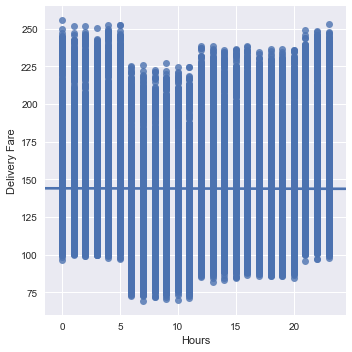

In [108]:
sns.lmplot(x='Hours',y='Delivery Fare',data=df)

Now we see that hour varies a lot, perhap, there is nothing todo with the hours

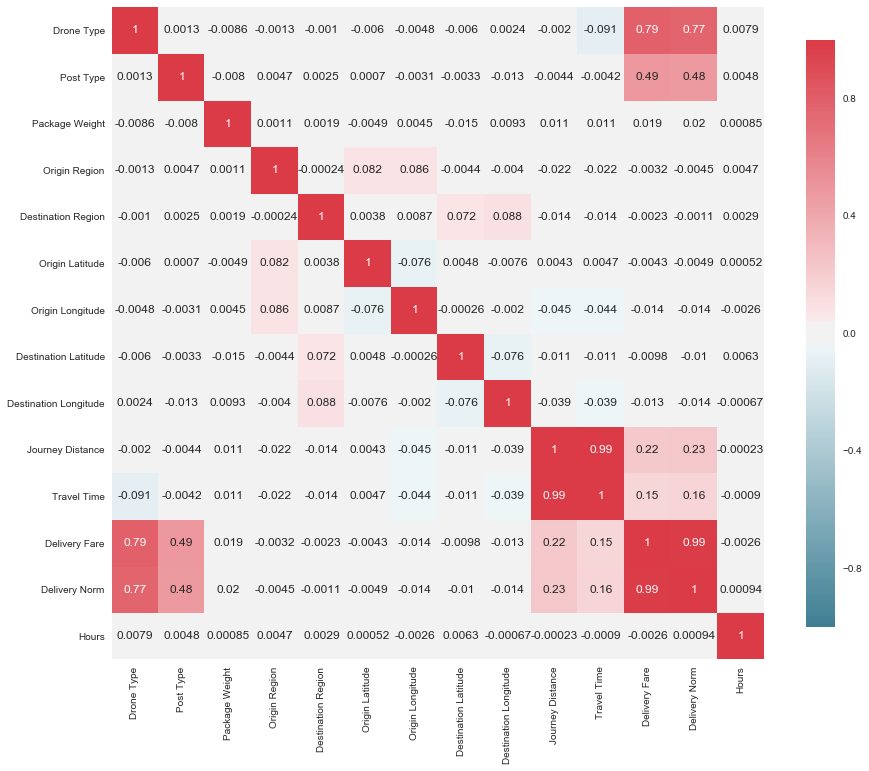

In [109]:
corr = df.drop(['Distance Diff','Time Diff','Actual Travel Time','Actual Journey Distance','Distance Diff',\
               'TT_1','TT_2','TT_3','New Drone Type','D','Speed_1','Speed_2','Speed_3','1','2','3'],axis=1).corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
plt.figure(figsize =( 15 , 12 ))
sns.heatmap(corr,cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 })


We want to know whether the shipping hours effect to the delivery fare. However, what we just have done is show the correlation between specific hours ( e.g: 1,2,3,4 ). 

Now, we want to see the correlation of Shift Hours ( morning, afternoon and night ) and delivery fare to see whether the shift hours effect to the delivery fare or not.

The shift hours are defined by the following rules.
```
Morning  :  6:00:00  - 11:59:59
Afternoon:  12:00:00 - 20:59:59
Night    :  21:00:00 - 5:59:59
```


In [110]:
df['Shift'] = None

# Shift hours for monring
df.loc[(df['Hours']<12)&(df['Hours']>=6),'Shift'] = 'M'
# Shift hours for afternoon
df.loc[(df['Hours']>=12)&(df['Hours']<21),'Shift'] = 'A'
# Shift hours for night
df.loc[(df['Hours']>=21),'Shift'] = 'N'
df.loc[(df['Hours']>=0)&(df['Hours']<6),'Shift'] = 'N'

Let's see the correlation of each specific shift hours with specific post type

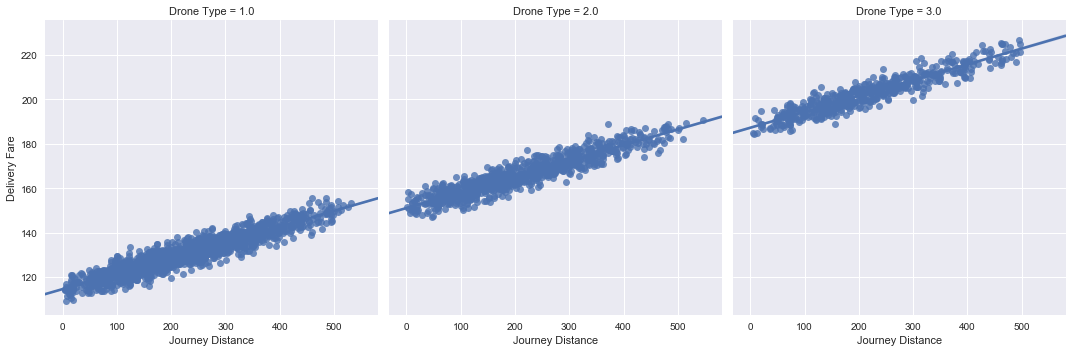

In [111]:
# for morning
df_ = df[(df['Shift']=='M') &(df['Post Type']==1)]
sns.lmplot(x='Journey Distance',y='Delivery Fare',col='Drone Type', data=df_)

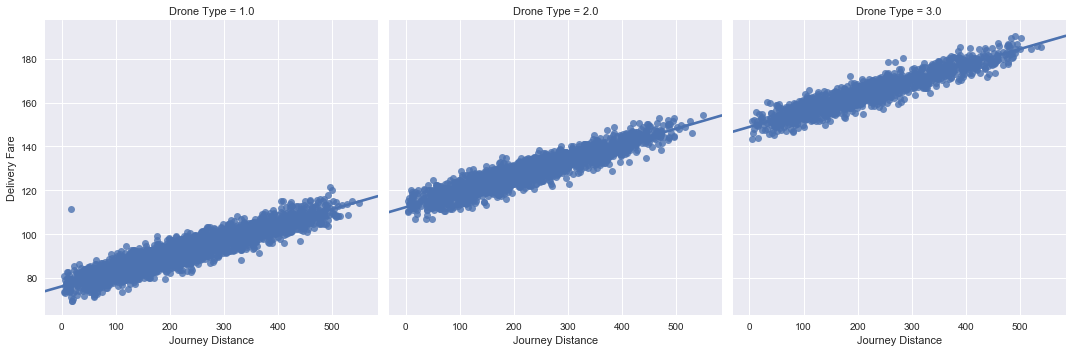

In [112]:
# for morning
df_ = df[(df['Shift']=='M') &(df['Post Type']==0)]
sns.lmplot(x='Journey Distance',y='Delivery Fare',col='Drone Type', data=df_)

In [113]:
# remove outlier
df = df.drop(df[(df['Shift']=='M') & (df['Post Type']==0)&(df['Delivery Fare']>100)&(df['Drone Type']==1)&\
               (df['Journey Distance']<100)].index)


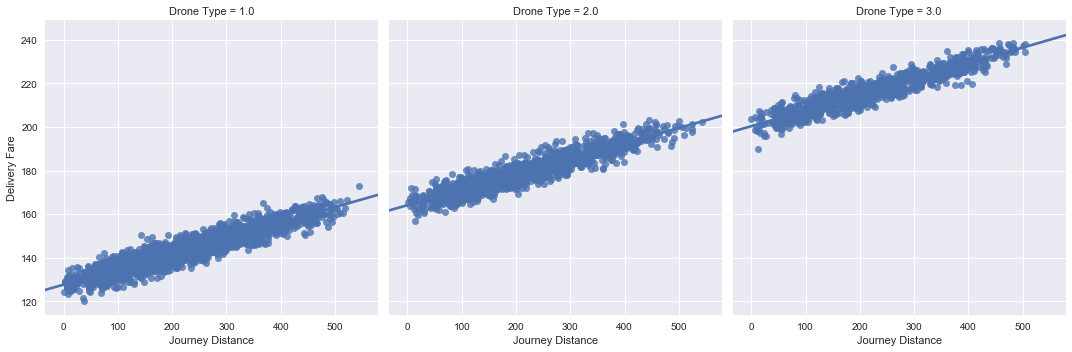

In [114]:
# for afternoon
df_ = df[(df['Shift']=='A') &(df['Post Type']==1)]
sns.lmplot(x='Journey Distance',y='Delivery Fare',col='Drone Type', data=df_)

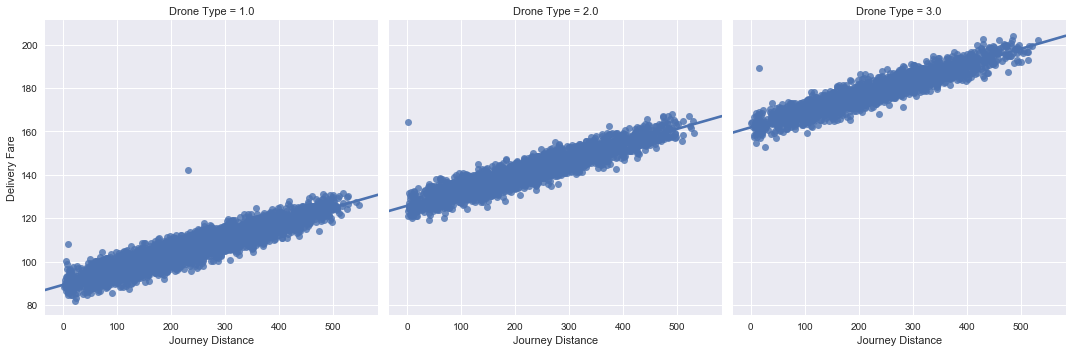

In [115]:
# for afternoon
df_ = df[(df['Shift']=='A') &(df['Post Type']==0)]
sns.lmplot(x='Journey Distance',y='Delivery Fare',col='Drone Type', data=df_)

In [116]:
# remove outlier
df = df.drop(df[(df['Shift']=='A') & (df['Post Type']==0)&(df['Delivery Fare']>140)&(df['Drone Type']==1)].index)
df = df.drop(df[(df['Shift']=='A') & (df['Post Type']==0)&(df['Delivery Fare']>160)&(df['Drone Type']==2) &\
               (df['Journey Distance']<100)].index)
df = df.drop(df[(df['Shift']=='A') & (df['Post Type']==0)&(df['Delivery Fare']>180)&(df['Drone Type']==3) &\
               (df['Journey Distance']<100)].index)
df = df.drop(df[(df['Shift']=='A') & (df['Post Type']==0)&(df['Delivery Fare']>105)&(df['Drone Type']==1) &\
               (df['Journey Distance']<50)].index)


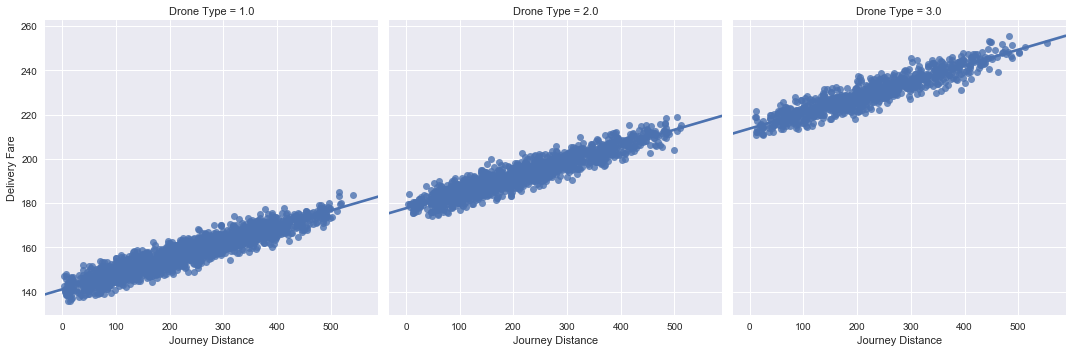

In [117]:
# at night
df_ = df[(df['Shift']=='N') &(df['Post Type']==1)]
sns.lmplot(x='Journey Distance',y='Delivery Fare',col='Drone Type', data=df_)

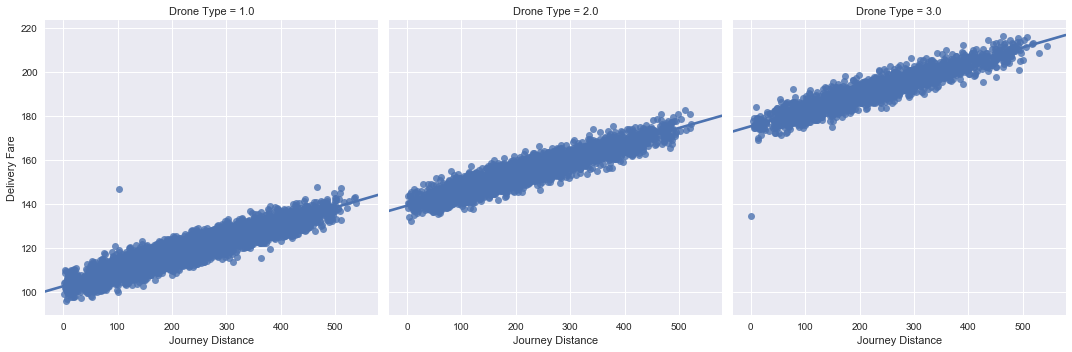

In [118]:
# at night
df_ = df[(df['Shift']=='N') &(df['Post Type']==0)]
sns.lmplot(x='Journey Distance',y='Delivery Fare',col='Drone Type', data=df_)

In [119]:
# remove outlier
df = df.drop(df[(df['Shift']=='N') & (df['Post Type']==0)&(df['Delivery Fare']>140)&(df['Drone Type']==1)&\
               (df['Journey Distance']<150)].index)

df = df.drop(df[(df['Shift']=='N') & (df['Post Type']==0)&(df['Delivery Fare']<160)&(df['Drone Type']==3)].index)


Apparently, shift working hours strongly effect to the delivery fare.

Shift Working Hours, Drone Type, Post Type, Travel Time and Journey Distance will be taken into consideration to create linear model as they have  high correlation with the Delivery Fare. 

We know that the package weight increase, the fare will increase as well, however, we see the correlation between Package Weight and Fare are very low and package weight also varies a lot against delivery fare, thus we will not take package weight into consideration.

From the last section, we've remove outlier of null data, let's see is there any null delivery fare from the rest of the dataset.

In [120]:
df[df['Delivery Fare'].isnull()]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,TT_1,TT_2,TT_3,1,2,3,New Drone Type,D,Hours,Shift
220,ID1562054526,2.0,0.0,37.225,6.0,25.0,-36.905486,147.728035,-36.995858,147.225244,...,49.50,47.85,44.07,1.65,0.00,3.78,2.0,0.0,19,A
2072,ID1725521968,1.0,0.0,39.676,34.0,37.0,-38.589916,144.012652,-38.532205,146.831470,...,233.73,226.58,205.94,0.02,7.13,27.77,1.0,0.0,9,M
2418,ID1592039797,1.0,0.0,26.294,30.0,6.0,-37.326405,146.717914,-36.861204,147.959557,...,119.61,115.87,105.67,0.02,3.72,13.92,1.0,0.0,12,A
7363,ID1718455342,1.0,0.0,13.700,25.0,15.0,-36.888779,147.287697,-36.525880,148.188978,...,90.27,87.40,79.89,0.03,2.84,10.35,1.0,0.0,14,A
10936,ID5133308320,1.0,1.0,33.686,19.0,4.0,-37.054064,145.720086,-38.658099,147.667070,...,235.45,228.26,207.46,0.02,7.17,27.97,1.0,0.0,4,N
12426,ID1349255384,1.0,0.0,22.770,40.0,26.0,-36.549747,143.454931,-38.393362,144.557599,...,216.87,210.22,191.13,0.02,6.63,25.72,1.0,0.0,10,M
14466,ID1359221191,1.0,0.0,38.775,39.0,22.0,-36.593210,145.846171,-37.832433,145.793671,...,134.59,130.40,118.83,0.03,4.16,15.73,1.0,0.0,8,M
14501,ID1513893906,3.0,0.0,34.683,3.0,5.0,-37.527264,147.529018,-37.953198,148.036479,...,67.31,65.13,59.72,7.60,5.42,0.01,3.0,0.0,7,M
14518,ID1860780123,2.0,0.0,31.287,26.0,35.0,-38.484967,144.495469,-38.139876,147.403923,...,244.32,236.86,215.25,7.46,0.00,21.61,2.0,0.0,5,N
14540,ID1889797995,2.0,0.0,30.000,45.0,33.0,-37.654587,142.898810,-36.825331,143.673519,...,113.37,109.82,100.19,3.56,0.01,9.62,2.0,0.0,23,N


Interestingly, all the null data of delivery fare have package weight less than 55. In other word, there is no null data of  delivery fare that we've removed.

From the given data, we know Drone Type and Post Type are categorical, thus, we will make 6 linear model and use Travel Time and Journey Distance to predict null Delivery Fare.

First, we'll get the data based on Drone Type and Post Type

In [121]:
from sklearn.linear_model import LinearRegression

df_monring = df[df['Shift'] == 'M']
df_afternoon = df[df['Shift'] == 'A']
df_night = df[df['Shift'] == 'N']

In [122]:
df_monring['Delivery Fare'].isnull().sum()

7

We will create a function that we want to impute delivery fare data

In [123]:
def imputing_delivery_fare_post_zero(df_shift,shift_hours,post_type):
    """
    This function use to impute delivery fare based on shift working hourse and post type
    :param
        df_shift: a dataframe of shift working hourse
        df_hours: a categorical represent for shift working
        post_type: a post type of drone ( 0 or 1)
    """
    # Get a dataframe based on Drone Type
    df_1_0 = df_shift[(df_shift['Post Type']==post_type) & (df_shift['Drone Type']==1)][['Travel Time','Journey Distance','Delivery Fare']].dropna()
    df_2_0 = df_shift[(df_shift['Post Type']==post_type) & (df_shift['Drone Type']==2)][['Travel Time','Journey Distance','Delivery Fare']].dropna()
    df_3_0 = df_shift[(df_shift['Post Type']==post_type) & (df_shift['Drone Type']==3)][['Travel Time','Journey Distance','Delivery Fare']].dropna()

    
    # Create a 3 linear model for each drone type
    lm_1_0 = LinearRegression()
    lm_1_0.fit(df_1_0[['Travel Time','Journey Distance']],df_1_0[['Delivery Fare']])

    lm_2_0 = LinearRegression()
    lm_2_0.fit(df_2_0[['Travel Time','Journey Distance']],df_2_0[['Delivery Fare']])

    lm_3_0 = LinearRegression()
    lm_3_0.fit(df_3_0[['Travel Time','Journey Distance']],df_3_0[['Delivery Fare']])

    
    # get the null data for specific drone type 1 and post type
    df_pr = df_shift[(df_shift['Post Type']==post_type) & (df_shift['Drone Type']==1) &(df_shift['Delivery Fare'].isnull())]
    if len(df_pr)>0:
        # Predict the delivery fare
        df_pr['Delivery Fare'] = lm_1_0.predict(df_pr[['Travel Time','Journey Distance']])
        # impute null fare
        df.loc[(df['Shift']==shift_hours)&(df['Post Type']==post_type) & (df['Drone Type']==1) &(df['Delivery Fare'].isnull()),'Delivery Fare'] = df_pr['Delivery Fare']

    # get the null data for specific drone type 1 and post type
    df_pr = df_shift[(df_shift['Post Type']==post_type) & (df_shift['Drone Type']==2) &(df_shift['Delivery Fare'].isnull())]
    if len(df_pr)>0:
         # Predict the delivery fare
        df_pr['Delivery Fare'] = lm_2_0.predict(df_pr[['Travel Time','Journey Distance']])
         # impute null fare
        df.loc[(df['Shift']==shift_hours)&(df['Post Type']==post_type) & (df['Drone Type']==2) &(df['Delivery Fare'].isnull()),'Delivery Fare'] = df_pr['Delivery Fare']
    
    # get the null data for specific drone type 1 and post type
    df_pr = df_shift[(df_shift['Post Type']==post_type) & (df_shift['Drone Type']==3) &(df_shift['Delivery Fare'].isnull())]
    if len(df_pr)>0:
         # Predict the delivery fare
        df_pr['Delivery Fare'] = lm_3_0.predict(df_pr[['Travel Time','Journey Distance']])
        # impute null fare
        df.loc[(df['Shift']==shift_hours)&(df['Post Type']==post_type) & (df['Drone Type']==3) &(df['Delivery Fare'].isnull()),'Delivery Fare'] = df_pr['Delivery Fare']


In [124]:
# Impute data for morning hours with drone type 0 and 1
imputing_delivery_fare_post_zero(df_monring,'M',0)
imputing_delivery_fare_post_zero(df_monring,'M',1)

# Impute data for afternoon hours with drone type 0 and 1
imputing_delivery_fare_post_zero(df_afternoon,'A',0)
imputing_delivery_fare_post_zero(df_afternoon,'A',1)

# Impute data at night hours with drone type 0 and 1
imputing_delivery_fare_post_zero(df_night,'N',0)
imputing_delivery_fare_post_zero(df_night,'N',1)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39038 entries, 0 to 39492
Data columns (total 36 columns):
Id                         39038 non-null object
Drone Type                 39038 non-null float64
Post Type                  39038 non-null float64
Package Weight             39038 non-null float64
Origin Region              39038 non-null float64
Destination Region         39038 non-null float64
Origin Latitude            39038 non-null float64
Origin Longitude           39038 non-null float64
Destination Latitude       39038 non-null float64
Destination Longitude      39038 non-null float64
Journey Distance           39038 non-null float64
Departure Date             39038 non-null object
Departure Time             39038 non-null object
Travel Time                39038 non-null float64
Delivery Time              39038 non-null object
Delivery Fare              39038 non-null float64
Actual Travel Time         39038 non-null float64
Time Diff                  39038 non-null flo

Our data now have been imputed and almost errors have been fixed. 

Now, it time to write down the data.

## 5. Writing Output

We will remove all the feature that unecessary


In [126]:
df.drop(['Actual Travel Time','Distance Diff','Delivery Norm','Time Diff','Actual Journey Distance','Time Diff 2','New Travel Time',\
         'Speed_1','Speed_2','Speed_3','TT_1','TT_2','TT_3','1','2','3','New Drone Type','D','Hours','Shift'],axis=1, inplace = True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39038 entries, 0 to 39492
Data columns (total 16 columns):
Id                       39038 non-null object
Drone Type               39038 non-null float64
Post Type                39038 non-null float64
Package Weight           39038 non-null float64
Origin Region            39038 non-null float64
Destination Region       39038 non-null float64
Origin Latitude          39038 non-null float64
Origin Longitude         39038 non-null float64
Destination Latitude     39038 non-null float64
Destination Longitude    39038 non-null float64
Journey Distance         39038 non-null float64
Departure Date           39038 non-null object
Departure Time           39038 non-null object
Travel Time              39038 non-null float64
Delivery Time            39038 non-null object
Delivery Fare            39038 non-null float64
dtypes: float64(12), object(4)
memory usage: 5.1+ MB


In [128]:
#write csv
df.to_csv("drone_shipping_solution.csv",index=False)

In [129]:
# read csv 
df_2 = pd.read_csv('drone_shipping_solution.csv')

In [130]:
df_2.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID5389656788,1.0,1.0,48.361,15.0,11.0,-36.611716,148.014884,-38.348180,143.342324,455.704,2018-03-24,00:37:24,427.80,07:45:12,175.89
1,ID1247245215,1.0,0.0,9.767,9.0,46.0,-37.386395,143.777755,-38.335037,148.389769,418.806,2018-07-26,04:09:17,393.74,10:43:01,129.57
2,ID1608889381,3.0,0.0,31.081,8.0,2.0,-36.570318,142.820171,-38.010240,146.193967,339.034,2018-06-24,14:18:53,281.78,19:00:39,188.84
3,ID1823716073,2.0,0.0,22.683,30.0,34.0,-37.159821,146.639043,-38.764968,143.946865,296.208,2018-04-12,03:20:18,272.05,07:52:21,154.03
4,ID1878258410,2.0,0.0,45.041,29.0,20.0,-38.668790,146.317208,-37.271839,143.310111,306.271,2018-06-22,04:39:12,281.06,09:20:15,161.66
